### This is the code file for different depot multiple drone case

In [1]:
# from global_variable import*
from testvariable import *
#from variable500grid import *
# from variable2000grid50sensor import *

In [2]:
import random
import networkx as nx
import math
import itertools    
import matplotlib.pyplot as plt
import ast
import numpy as np
import operator
from sklearn.cluster import KMeans
from collections import defaultdict
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from gurobipy import *
import gurobipy as gp
from collections import Counter

### The lines below are the files to be called

In [10]:
txt_files = [
    'test500grid10sensortest1.txt',
    'test500grid10sensortest2.txt',
    'test500grid10sensortest3.txt',
    'test500grid10sensortest4.txt',
    'test500grid10sensortest5.txt',
    'test500grid10sensortest6.txt',
    'test500grid10sensortest7.txt',
    'test500grid10sensortest8.txt',
    'test500grid10sensortest9.txt',
    'test500grid10sensortest10.txt'
    ]

In [11]:
# txt_files = [
#     'test500grid20sensortest1.txt',
#     'test500grid20sensortest2.txt',
#     'test500grid20sensortest3.txt',
#     'test500grid20sensortest4.txt',
#     'test500grid20sensortest5.txt',
#     'test500grid20sensortest6.txt',
#     'test500grid20sensortest7.txt',
#     'test500grid20sensortest8.txt',
#     'test500grid20sensortest9.txt',
#     'test500grid20sensortest10.txt'
#     ]

In [12]:
# txt_files = [
#     'test500grid40sensortest1.txt',
#     'test500grid40sensortest2.txt',
#     'test500grid40sensortest3.txt',
#     'test500grid40sensortest4.txt',
#     'test500grid40sensortest5.txt',
#     'test500grid40sensortest6.txt',
#     'test500grid40sensortest7.txt',
#     'test500grid40sensortest8.txt',
#     'test500grid40sensortest9.txt',
#     'test500grid40sensortest10.txt'
#     ]

In [13]:
# txt_files = [
#     'test700grid10sensortest1.txt',
#     'test700grid10sensortest2.txt',
#     'test700grid10sensortest3.txt',
#     'test700grid10sensortest4.txt',
#     'test700grid10sensortest5.txt',
#     'test700grid10sensortest6.txt',
#     'test700grid10sensortest7.txt',
#     'test700grid10sensortest8.txt',
#     'test700grid10sensortest9.txt',
#     'test700grid10sensortest10.txt'
#     ]

In [14]:
# txt_files = [
#     'test700grid20sensortest1.txt',
#     'test700grid20sensortest2.txt',
#     'test700grid20sensortest3.txt',
#     'test700grid20sensortest4.txt',
#     'test700grid20sensortest5.txt',
#     'test700grid20sensortest6.txt',
#     'test700grid20sensortest7.txt',
#     'test700grid20sensortest8.txt',
#     'test700grid20sensortest9.txt',
#     'test700grid20sensortest10.txt'
#     ]

In [15]:
# txt_files = [
#     'test700grid40sensortest1.txt',
#     'test700grid40sensortest2.txt',
#     'test700grid40sensortest3.txt',
#     'test700grid40sensortest4.txt',
#     'test700grid40sensortest5.txt',
#     'test700grid40sensortest6.txt',
#     'test700grid40sensortest7.txt',
#     'test700grid40sensortest8.txt',
#     'test700grid40sensortest9.txt',
#     'test700grid40sensortest10.txt'
#     ]

In [16]:
# txt_files = [
#     'test1000grid10sensortest1.txt',
#     'test1000grid10sensortest2.txt',
#     'test1000grid10sensortest3.txt',
#     'test1000grid10sensortest4.txt',
#     'test1000grid10sensortest5.txt',
#     'test1000grid10sensortest6.txt',
#     'test1000grid10sensortest7.txt',
#     'test1000grid10sensortest8.txt',
#     'test1000grid10sensortest9.txt',
#     'test1000grid10sensortest10.txt'
#     ]

In [17]:
# txt_files = [
#     'test1000grid20sensortest1.txt',
#     'test1000grid20sensortest2.txt',
#     'test1000grid20sensortest3.txt',
#     'test1000grid20sensortest4.txt',
#     'test1000grid20sensortest5.txt',
#     'test1000grid20sensortest6.txt',
#     'test1000grid20sensortest7.txt',
#     'test1000grid20sensortest8.txt',
#     'test1000grid20sensortest9.txt',
#     'test1000grid20sensortest10.txt'
#     ]

In [18]:
# txt_files = [
#     'test1000grid40sensortest1.txt',
#     'test1000grid40sensortest2.txt',
#     'test1000grid40sensortest3.txt',
#     'test1000grid40sensortest4.txt',
#     'test1000grid40sensortest5.txt',
#     'test1000grid40sensortest6.txt',
#     'test1000grid40sensortest7.txt',
#     'test1000grid40sensortest8.txt',
#     'test1000grid40sensortest9.txt',
#     'test1000grid40sensortest10.txt'
#     ]

## function just to calculate distance between two pdp points

In [19]:
def distance(points,i,j):
    '''
    This function is used to calculate the distance between two points
    It returns distance between two points
    '''
    x=points[i][0]-points[j][0]
    y=points[i][1]-points[j][1]
    return math.sqrt(x*x+y*y)

## Function to determine the pdp position in the grid

In [20]:
def calculate_Pdp_positions(length_of_grid,transmission_range):
    '''
    >>This function calculates the drone hovering points
    >>It takes input as length of grid and transmission range. We need the grid points which are r√2 distance apart
    >>it returns the hovering points and the threshold grid size
    '''
    pdp_positions={}
    k=0
    for c_1 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
        for c_2 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
            pdp_positions[k]=(c_1*transmission_range*math.sqrt(2),c_2*transmission_range*math.sqrt(2))
            k=k+1
    threshold_grid_size=c_1*transmission_range*math.sqrt(2) #get threshold grid size
    return pdp_positions,threshold_grid_size

## Function to create the trip graph

In [23]:
def create_trip_graph(pdp_positions):
    '''
    We use this function to create trip graph between the hovering points.
    It returns Graph and distance between hovering points.
    '''
    G=nx.Graph()
    distance_between_pdp={}
    for i in range(len(pdp_positions)):
        G.add_node('pdp{}'.format(i),pos=pdp_positions[i]) ## Here it adds the hovering points as nodes in the graph 
    for u in range(len(pdp_positions)):
        for v in range(len(pdp_positions)):
            wt=distance(pdp_positions,u,v)     #calculates the distance between hovering points
            G.add_edge('pdp{}'.format(u),'pdp{}'.format(v),weight=wt) ## Assigns the distance as edge weight
            distance_between_pdp[(u,v)]=wt
    return G,distance_between_pdp

In [24]:
# trip_graph,distance_between_pdp=create_trip_graph(pdp_positions)

## This function calculates the pdp with the minimum distance betweeen the cluster center

In [25]:
def calculate_min_pdp_distance_with_cluster_center(c_centers,pdp_positions):
    """
    Function to calculate the nearest pdp_position to the cluster center
    input: cluster center and drone hovering points
    output: dictionary ,where key is the cluster center and value is the nearest hovering point
    """
    new_dict={}
    for i in c_centers:
        temp={}
        for p,value in pdp_positions.items():
            arr=np.array(value)
            dist=np.linalg.norm(i-arr)
            temp[p]=dist
        new_dict[tuple(i)]=min(temp.items(),key=operator.itemgetter(1))[0]

    return new_dict

In [28]:
def calulate_distance_between_each_sensors_and_assign_weight(points,K):
    '''
    >>This function is used to assign the edge weight between the sensors.
    >>It calculates the distance between each of the sensor and adds edge weight in the graph
    if distance is less than transmission range it assigns the edge weight as 1 
    input:sensor points and graph
    output:distance between sensor and graph
    '''
    distance_sensors={}
    M=K
    k=0
    edge_weight=1
    for i in range(len(points)):
        for j in range(len(points)):
            euclidean_distance=distance(points,i,j)
            if i!=j:
                if euclidean_distance<=transmission_range:
                    M.add_edge("sensor{}".format(i),"sensor{}".format(j)) #add edge between the sensors

                    M["sensor{}".format(i)]["sensor{}".format(j)]['weight']=1 #add edge weight

                    distance_sensors[i,j]=(euclidean_distance,edge_weight)
    return distance_sensors,M

In [29]:
# euclidean_distance_between_sensor,L=calulate_distance_between_each_sensors_and_assign_weight(sensor,K)

In [30]:
# nx.draw(L,nx.get_node_attributes(L,'pos'),with_labels=True)

In [31]:
def distance_pdp_sensors(pdp_positions,sensor,u,v):
    '''
    >>this function calculate distance between sensor and hovering points
    >>input:hovering points ,sensor and index
    >>output: distance between the points
    '''
    x=pdp_positions[u][0]-sensor[v][0]
    y=pdp_positions[u][1]-sensor[v][1]
    return math.sqrt(x*x+y*y)

## Function that is used for creating the conncectivity graph

In [32]:
def connectivity_graph(pdp_positions,sensor,K):
    '''
    this function creates connectivity graph between hovering points and sensors.
    >>calculates distance between hovering point and sensor if the distance is less than transmission range it assigns weigth as 1
    >>input:hovering points ,sensor position and graph
    >>output:Distance between hovering points andeach sensor, and Graph
    '''
    J=K
    distance_pdp_each_sensor={}
    k=0
    weight=1
    for i in range(len(pdp_positions)):
        J.add_node('pdp{}'.format(i),pos=pdp_positions[i]) #add hovering points as nodes in the graph
    for u in range(len(pdp_positions)):
        for v in range(len(sensor)):
            euclidean_distance_between_pdp_sensor=distance_pdp_sensors(pdp_positions,sensor,u,v)
            J.add_edge("pdp{}".format(u),"sensor{}".format(v))  #add edge between hovering points and sensors
            
            if euclidean_distance_between_pdp_sensor<=transmission_range:
                J["pdp{}".format(u)]["sensor{}".format(v)]['weight']=1  #add edge weight
                distance_pdp_each_sensor[u,v]=euclidean_distance_between_pdp_sensor,weight
            else:
                J["pdp{}".format(u)]["sensor{}".format(v)]['weight']=100
                distance_pdp_each_sensor[u,v]=euclidean_distance_between_pdp_sensor,100
    return distance_pdp_each_sensor,J

In [33]:
# distance_between_pdp_to_each_sensor,N=connectivity_graph(pdp_positions,sensor,L)

# Here it finds the shortest distance between each pdp and 

In [34]:
def shortest_distance_pdp_sensor(pdp_positions, sensor, N):
    '''
    calculates the shortest distance between hovering point and sensor
    >>uses dijkstra algorithm to calculate the shortest path
    >>input: hovering points, sensor and Graph
    >>output:dictionary of path between hovering point and sensor and its path length
    '''
    k=0
    arc_length={}
    shortest_path={}
    for i in range(len(pdp_positions)):
        for j in range(len(sensor)):
            if N.has_edge('pdp{}'.format(i),'sensor{}'.format(j)):
                shortest_path[i,j]=nx.shortest_path(N,source='pdp{}'.format(i),target='sensor{}'.format(j),
                                                  weight='weight',method='dijkstra')   # get path between the hovering point and sensor
                arc_length[i,j]=nx.dijkstra_path_length(N,'pdp{}'.format(i),'sensor{}'.format(j)) #get pathlength between hovering point and sensor


            else:
                shortest_path[i,j]=0
    return dict(zip(arc_length.items(),shortest_path.values())), arc_length 

In [35]:
def spanning_tree_collecting_time(pdp):
    """This function defines which sensors are connected with the desired pdp
    Input :Route(list of hovering points)
    Output:spanning tree(key:hovering points,value:list of sensors connected
    """
    
    sensor_subset=[]
    for key,value in new_zipped.items(): #newzipped is of form {((0,0),100):[pdp0,sensor0]} where 0,0 is hoveringpoint0 and sensor0 and 100 is the path length in our case it means there is no path
        if key[0][0]==pdp:
            if key[1]!=100:
                #print(i)
                sensor_subset.append(key[0][1])
    return sensor_subset

In [36]:
def to_check_the_minimum_hops_between_the_pdp_and_sensor(spanning_tree):
    """In this function we check which sensor can send data to the pdp with minimum hops
    for example if sensor2 is connected with pdp10 with  hop distance with 2 and same sensor2 is connected with 
    pdp11 with hop distance 4 then we assume that sensor2 will send data to the drone when drone is at pdp10 since 
    it has minimum hop distance"""
    subset2=spanning_tree
    for key,value in subset2.items():
        for key1,value1 in subset2.items():
            if key!=key1:
                for i in value:
                    for j in value1:
                        if i==j:
                            #print(i)
                            #s=get_number(i)
                            if nx.dijkstra_path_length(N,'pdp{}'.format(key),'sensor{}'.format(i))>nx.dijkstra_path_length(N,'pdp{}'.format(key1),'sensor{}'.format(i)):
                                subset2[key].remove(i)
                            else:
                                subset2[key1].remove(j)
    return subset2

In [37]:
def create_spanning_tree_for_tour(tour):
    '''
    create spanning tree for hovering points
    >>Input :Route
    >>Output: spanning tree : key is the hovering point and value is the list of sensors
    '''
    sensor_subset={}
    for i in tour:
        sensor_subset[i]=spanning_tree_collecting_time(i)
    correct_sensor_subset=to_check_the_minimum_hops_between_the_pdp_and_sensor(sensor_subset)
    return correct_sensor_subset

In [38]:
def check_all_sensor_can_send_data(checked_sensor_arc):
    """The main aim of creating this function was to check whether all the sensors are connected to the pdps in the route
    of drone tour.For example we have pdp10 and pdp7 in our route.ie Route=[10 7].We create spanning tree for the both 
    the pdps and check whether all the sensors are connected or not.If all the sensors are not connected in the combined
    spanning tree calculated with the pdps of the Route"""
    s=[]
    for key,values in checked_sensor_arc.items(): #key is the hovering point and values is the list of sensors
        s=list(set().union(s,values))
    if len(s)==len(sensor): # before there was only s==sensor but it was wrong as s is list and sensor is a list of tuple
        return 1
    else:
        return 0
    

In [39]:
def determine_collecting_time(checked_sensor_arc):
    """After checking whether all the sensor can send data while the drone makes a trip in the way as
    described in the Route.We assign collecting time as infinite or call the collecting time function"""
    value=check_all_sensor_can_send_data(checked_sensor_arc)
    if value==1:
        t_collecting=calculate_collecting_time(checked_sensor_arc)
    if value==0:
        t_collecting=math.inf
    return t_collecting

In [40]:
def check_all_sensor_can_send_data(checked_sensor_arc):
    """The main aim of creating this function was to check whether all the sensors are connected to the pdps in the route
    of drone tour.For example we have pdp10 and pdp7 in our route.ie Route=[10 7].We create spanning tree for the both 
    the pdps and check whether all the sensors are connected or not.If all the sensors are not connected in the combined
    spanning tree calculated with the pdps of the Route"""
    s=[]
    for key,values in checked_sensor_arc.items(): #key is the hovering point and values is the list of sensors
        s=list(set().union(s,values))
    if len(s)==len(sensor): # before there was only s==sensor but it was wrong as s is list and sensor is a list of tuple
        return 1
    else:
        return 0
    

In [41]:
def calculate_collecting_time(checked_sensor_arc,check_key):
    '''
    this function is used to calculate the collecting time, it gets input as the hovering points and sensors associated with it.
    '''
    for k,v in new_group.items(): #key is the drone index and value is the list of sensors
        if k ==check_key:
            check_list=v
    dict_={}
    for key,values in checked_sensor_arc.items(): #key is the hovering point and value is the list of sensors
        t_collecting=0
        weight=0
        if values!=[]:
            for j in values:
                if j in check_list:
                    
                    for key1,values1 in new_zipped.items():#newzipped is of form {((0,0),100):[pdp0,sensor0]} where 0,0 is hoveringpoint0 and sensor0 and 100 is the path length in our case it means there is no pat
                        if key1[0]==(key,j):
                            weight=weight+key1[1]
                            t_collecting=(data_stored/bandwidth)*weight
        else:
            continue
            
        dict_[key]=t_collecting
    return dict_
    

In [42]:
def calculate_collecting_time_each(lis,key):
    """function will get the list of index of customer in each subtour
    -then we compare the values of total instance. This total has the coordinates of depot and the pdps near to the cluster
        center
    -we then append the keys of the pdp_position instance so we get the index of pdps where the sensors are connected and collection time should be calculated
    """
    new_list=[]
    subset={}
    for val in lis:
        for keys,v in pdp_positions.items(): #key is the index and v is the hovering points' coordinate
            if v == tuple(total[val]):
                new_list.append(keys)
    for values in new_list:
        subset[values]=spanning_tree_collecting_time(values)
    checked=to_check_the_minimum_hops_between_the_pdp_and_sensor(subset)
    collect_time=calculate_collecting_time(checked,key)
    
    return collect_time


In [43]:
def calculate_total_collecting_time(subtour):
    '''
    this is the function that converts the index into hovering points
    and calculate collecting time. the subtour has index as the input we need to convert this index into respective hovering points
    '''
    total_col={}
    for key , values in subtour.items(): #key is the index of drone and value is the list of index of hovering points that is used to solve mTSP
        xx=values[:len(values)-1]
        total_col[key]=calculate_collecting_time_each(xx,key)
    totally=0
    each_total={}
    for key,val in total_col.items(): #key is the index of drone and value ist the total time for each drone
        temp=0
        for v,k in val.items():
            temp=temp+k
            totally=totally+k
        each_total[key]=temp 
    return each_total



In [44]:
def threshold_distance_inside_sensor_range():
    '''
    this function calculates the desired threshold distance that should be travelled by the Drone so that sensor can send data 
    while the drone is moving.
    '''
    trs=(data_stored/bandwidth)*drone_speed
    return trs

In [45]:
def update_spanning(route):
    '''
    This function creates the spanning tree for each of the hovering point in the route
    '''
    spanning_tree_for_pdp={}
    route=route
    for i in route:
        spanning_tree_for_pdp[i]=spanning_tree_collecting_time(i)
    return(spanning_tree_for_pdp)
    
    

In [46]:
def sensor_that_can_send_data_while_moving(init,final,key):
    '''
    This function checks which sensor can send data while the drone is hovering from one point to another
    >>Input: two hovering points 
    >>output:list of sensors
    '''
    dmov=[]
    
    sensor_that_can_send_data_whilmoving={}
    for key1,value in new_group.items():
        if key1==key:
            temp=value
    for i in temp:
        flag=0
        p1=np.array(pdp_positions[init])
        p2=np.array(pdp_positions[final])
        p3=np.array(sensor[i])
        dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp
        if dist<transmission_range:
            dsi=(2*(math.sqrt(transmission_range**2-dist**2)))/np.linalg.norm(p2-p1)
            project=np.dot(p3-p1,p2-p1)/(np.linalg.norm(p2-p1))**2
            check1=project-dsi/2
            check2=project+dsi/2
            if check1<1 and check2<1:
                if check1<0 and check2>0:
#                     print("the first cut point is outside the line segment whereas second cut point lies in the line segment")
                    first_cutx=pdp_positions[init][0]
                    first_cuty=pdp_positions[init][1]
                    second_cutx=pdp_positions[init][0]+(check2*(pdp_positions[final][0]-pdp_positions[init][0]))
                    second_cuty=pdp_positions[init][1]+(check2*(pdp_positions[final][1]-pdp_positions[init][1]))
                    flag=1
                if check1>0 and check2>0:
#                     print("the both cut point lies in the line segment")
                    first_cutx=pdp_positions[init][0]+(check1*(pdp_positions[final][0]-pdp_positions[init][0]))
                    first_cuty=pdp_positions[init][1]+(check1*(pdp_positions[final][1]-pdp_positions[init][1]))
                    second_cutx=pdp_positions[init][0]+(check2*(pdp_positions[final][0]-pdp_positions[init][0]))
                    second_cuty=pdp_positions[init][1]+(check2*(pdp_positions[final][1]-pdp_positions[init][1]))
                    flag=1
            
            if check1>0 and check2>1:
                if check1<1:
#                     print("the first cut point is inside the line segment whereas second cut point is outside the line segment")
                    first_cutx=pdp_positions[init][0]+(check1*(pdp_positions[final][0]-pdp_positions[init][0]))
                    first_cuty=pdp_positions[init][1]+(check1*(pdp_positions[final][1]-pdp_positions[init][1]))
                    second_cutx=pdp_positions[final][0]
                    second_cuty=pdp_positions[final][1]
                    flag=1
                
                
 
            if flag==1:
                sensor_that_can_send_data_whilmoving[i]=(first_cutx,first_cuty),(second_cutx,second_cuty)

    """We need to find the distance of the cut points so to find it we are doing the following steps
    """
    new_dict={}
     #calculate the distance of first cutpoint and second cut point from the initial hovering point
    for k,value in sensor_that_can_send_data_whilmoving.items():
        p1=np.array(pdp_positions[init])
        p2=np.array(value[0])
        p3=np.array(value[1])
        cut1=np.linalg.norm(p1-p2)
        cut2=np.linalg.norm(p1-p3)
        new_dict[k]=(cut1,cut2)
    sorted_dict=list(sorted(new_dict.items(), key=lambda item: item[1])) #sort the sensors according to  distance of first cut point from the initial hovering point 
    """I am putting flag to check if there is no any sensor that can send data while drone is moving from one point
    to another
    """
    flag=0
    
    
    """We need to check whether the overlapped sensors can send data or not so in the following steps that is cal
    culated"""
    if sorted_dict!=[]:
        flag=1 
        """
        The first element is appended because while checking the overlapping of the sensors 
        """
        if len(sorted_dict)==1:
            distance=sorted_dict[0][1][0]+threshold_distance_inside_sensor_range()
            if distance<sorted_dict[0][1][1]: #check whether the distance between cutpoints is greater than threshold distance
                dmov.append(sorted_dict[0][0])
                return (flag,dmov)
        for i,value in enumerate(sorted_dict):
            if i==0:
                first_cutpoint=value[1][0]
            second_cutpoint=value[1][1]
            check_1=second_cutpoint-first_cutpoint
            if check_1>=threshold_distance_inside_sensor_range(): #check whether the  distance two cut points of the sensor in the hovering line is greater than thershold distance
                distance_travelled=first_cutpoint+threshold_distance_inside_sensor_range()
                if i<len(sorted_dict)-1:
                    first_cutpoint=max(distance_travelled,sorted_dict[i+1][1][0]) #get starting point for next iteration
                dmov.append(value[0])
            else:
                if i<len(sorted_dict)-1:
                    first_cutpoint=max(sorted_dict[i][1][1],sorted_dict[i+1][1][0]) #get starting point for next iteration
        return(flag,dmov)

            



    return(flag,[])







        
    

In [47]:
def calculate_moving_time(Route,key):
    '''
    This function is used to calculate the time that is required by drone to collect data from the sensors while the drone is moving from the hovering points in the Route
    Input:list of hovering points as route and checked dictionary
    Output:moving time
    '''
    key_to_check=key
    route=Route
    total=0
    Dmov=defaultdict(list)
    subset=update_spanning(route[1:])
    checked=to_check_the_minimum_hops_between_the_pdp_and_sensor(subset)
    path=route
    for i in range(len(path)-1):
        flag,dmov=sensor_that_can_send_data_while_moving(path[i],path[i+1],key) #get list of sensors that can send data while it is moving from one hovering point to another
        if flag == 1:
            for value in dmov:
                if value not in Dmov.values() :
                    Dmov[path[i],path[i+1]].append(value)
    """Here just trying to remove the repeated sensor list in the route"""
    print(Dmov)
    for key,value in Dmov.items():
        for key1,val1 in Dmov.items():
            if key!=key1:
                for val in value:
                    if val in val1:
                        val1.remove(val)
    """
    Here we find the path length between the sensors that can send data and the hovering points related to the sensor while the drone is moving
    """
    for key,values in Dmov.items():
        for val in values:
            for key1,val1 in checked.items():
                if val in val1:
                    total=total+arc_length[key1,val]
            
            

    moving_time=(data_stored/bandwidth)*total
    return moving_time
            
    
                
            
        

In [48]:
def calculate_moving_time_collection(subtour):
    '''
    This function determines the real index of the hovering point so that the time required to collect data from the sensor while drone is moving can be calcualted
    '''
#     global gDmov
#     gDmov=[]
    total_col={}
    for key,values in subtour.items(): #key is the index of the drone ,values is the list of sensor
        real_pdp=[]
        for val in values:
            for keys,v in pdp_positions.items():
                if v==tuple(total[val]):
                    real_pdp.append(keys) #get real index of hovering points after solving the mTSP
        total_col[key]=calculate_moving_time(real_pdp,key)
    return total_col

In [49]:
def calc_trip_time(subtour,Depot):
    """
    This function is used to calculate the trip time of each drone . The subtour dictionary has tour for each 
    drone.
    """
    sub_route_total_distance = {}

    for i in range(len(Depot)):
        sub_route_total_distance[i] = 0
        for j in range(len(subtour[i])):
            if j<len(subtour[i])-1:

                cur_index = subtour[i][j]
                next_index=subtour[i][j+1]
                sub_route_total_distance[i] += dist_matrix[cur_index][next_index] #get tour distance for each drone 
    temp={}
    for k,v in sub_route_total_distance.items():
        temp[k]=v/drone_speed

    return temp
    
    

In [50]:
def all_routes_converter(all_routes):
    '''
    this function maps the index of the route of drones  with the hovering points
    '''
    new_dict=defaultdict(list)
    for key,values in all_routes.items():
        for val in values:
            for keys,v in pdp_positions.items():
                if v==tuple(total[val]):
                    new_dict[key].append(keys)
    return new_dict
            

In [51]:
def get_correct_route(check_sensor_arc_length):
    '''
    this function is used to check if there are hovering points without sensors connected to it
    '''
    temp=[]
    for key,value in check_sensor_arc_length.items():
        if value!=[]:
            temp.append(key)
    return temp
        

In [52]:
def calc_cluster_number(sensor, pdp_positions):
    '''
    This function finds cluster centers ,determines the hovering points nearest to the cluster center and assign these hovering points to the multiple drones
    '''
    M=1000*1000
    global total
    global dist_matrix
    global new_group
    
    best_time=math.inf
    for i in range(1,len(sensor)+1):
        new_dict={}
        kmeans=KMeans(n_clusters=i,random_state=2000)
        kmeans.fit(X)
        c_centers=tuple(kmeans.cluster_centers_)
        for j in c_centers:
            temp={}
            for p,value in pdp_positions.items():
                arr=np.array(value)
                dist=np.linalg.norm(j-arr)
                temp[p]=dist
#           print(temp)
            new_dict[tuple(j)]=min(temp.items(),key=operator.itemgetter(1))[0]
        subset={}
        print(new_dict)
        for key,values in new_dict.items():
            subset[values]=spanning_tree_collecting_time(values)
        checked=to_check_the_minimum_hops_between_the_pdp_and_sensor(subset)
        check=check_all_sensor_can_send_data(checked)
        if check==1:
            just_route=get_correct_route(checked)
            coordinates=[]
            for key,values in checked.items():
                if values!=[]:
                    
                    for k,v in pdp_positions.items():
                        if key==k:
                            l=list(v)
                            coordinates.append(l)
            '''
            From here the mTSP solving part starts
            ''' 
            
            #####------------- From here MTSP starts----------####
            if no_of_vehicles==2:
                depot=[(0,0),(threshold,threshold)]  #Depot assignment
            if no_of_vehicles==3:
                depot=[(0,0),(threshold,threshold),(0,threshold)]
            if no_of_vehicles==4:
                depot=[(0,0),(threshold,threshold),(0,threshold),(threshold,0)]
            total=depot+coordinates
            m = Model("MVRP")
            x={}
            for i in range(len(total)):
                for j in range(len(total)):
                    for k in range(len(depot)):
                        x[i,j,k]=m.addVar(vtype=gurobipy.GRB.BINARY,name="x%d,%d,%d" %(i,j,k))  #decision variable
            Depot=[x for x in range(len(depot))]             #index for depot
            customers=[x for x in range(len(depot),len(total))]   #index for customers or the hovering points
            L=len(customers)    #define maximum hovering points to be visited
            K=L//len(Depot)
            if L==no_of_vehicles:
                K=1
            dist_dep_cus={}
            for k in Depot:
                for i in customers:
                    dist_dep_cus[k,i]=np.linalg.norm(np.array(depot[k])-np.array(total[i]))     #calculate distance between deport and the hovering points

            dist_cus_cus={}
            for i in customers:
                for j in customers:
                    dist_cus_cus[i,j]=np.linalg.norm(np.array(total[i])-np.array(total[j]))        #calculate distance between hovering points
                    if i==j:
                        dist_cus_cus[i,j]=M
                    continue

            u={}
            for i in customers:
                u[i]=m.addVar(lb=0,ub=L,vtype=gurobipy.GRB.INTEGER, name='u_' + str(i))

            overall=[x for x in range(len(total))]
            d={}

            for k in range(len(depot)):
                d[k]=1

            for k in Depot:
                m.addConstr(gp.quicksum(x[k,j,k]for j in customers)==d[k]) # constraint ensures d[k] drones leaves form the depot[k]

            for j in customers:
                m.addConstr(gp.quicksum(x[(k,j,k)] for k in Depot)+ gp.quicksum(gp.quicksum(x[(i,j,k)] for i in customers) for k in Depot)==1) #this constraint ensures each hvoering point is visited exactly once

            for j in customers:
                for k in Depot:
                    m.addConstr(x[k,j,k]+gp.quicksum(x[i,j,k] for i in customers)-x[j,k,k]-gp.quicksum(x[j,i,k] for i in customers)==0) #it is the route continuity constraint for hovering nodes
            for k in Depot:
                m.addConstr(gp.quicksum(x[k,j,k] for j in customers)-gp.quicksum(x[j,k,k] for j in customers)==0) #it is the  route continuity constraint for depot nodes

            for i in customers:
                m.addConstr(u[i]+(L-2)*gp.quicksum(x[k,i,k] for k in Depot)-gp.quicksum(x[i,k,k] for k in Depot) <= L-1) #upper bound constraint

            for i in customers:
                m.addConstr(u[i]+gp.quicksum(x[k,i,k]for k in Depot)+(2-K)*gp.quicksum(x[i,k,k] for k in Depot)>=2) #lower bound constraint
            
            if K !=1:
                
                for i in customers:
                    m.addConstr(gp.quicksum(x[k,i,k] for k in Depot)+gp.quicksum(x[i,k,k] for k in Depot)<=1) #restrict drone visting single hovering point

            for i in customers:
                for j in customers:
                    if i!=j:
                        m.addConstr(u[i]-u[j]+L*gp.quicksum(x[i,j,k] for k in Depot)+(L-2)*gp.quicksum(x[j,i,k] for k in Depot)<=L-1) #subtour eliminating constraint

            z=m.addVar(vtype=GRB.CONTINUOUS,name='z')

#             m.addConstr(gp.quicksum(gp.quicksum(dist_dep_cus[k,j]*x[k,j,k]+dist_dep_cus[k,j]*x[j,k,k] for j in customers)for k in Depot )+gp.quicksum(gp.quicksum(gp.quicksum(dist_cus_cus[i,j]*x[i,j,k] for j in customers)for i in customers) for k in Depot)<=z)
#             m.setObjective(z,GRB.MINIMIZE)
            m.addConstr(gp.quicksum(gp.quicksum(dist_dep_cus[k,j]*x[k,j,k]+dist_dep_cus[k,j]*x[j,k,k] for j in customers)for k in Depot )+gp.quicksum(gp.quicksum(gp.quicksum(dist_cus_cus[i,j]*x[i,j,k] for j in customers)for i in customers) for k in Depot)<=z)
            m.setObjective(z,GRB.MINIMIZE)
            m.optimize()
            solution = m.getAttr('X', x)
            
            
            ###################------------------MTSP ends here ############

            selected=[]
            for key,val in solution.items():
                if val>0:
                    selected.append(key)
            subtour= defaultdict(list)
            
            '''
           #### get the sub tour for each drone
            '''

            for i in Depot:
                subtour[i]=[]
                next_city=selected[i][0]
                finished=False
                while not finished:
                    for j in range(len(selected)):
                        if selected[j][0]==next_city:
                            #print(type(subtour))
                            subtour[i].append(next_city)
                            #print(next_city)
                            next_city=selected[j][1]
                            break
                    if next_city in Depot:
                        subtour[i].append(next_city)
                        finished=True
            dist_matrix = np.empty([len(total), len(total)])
            ###########
            
            ######### get distance matrix between the hovering points and depots
            for i in range(len(total)):
                for j in range(len(total)):

                    dist_matrix[i,j]=np.linalg.norm(np.array(total[i])-np.array(total[j]))
            ######################################
            
           
        ###### group the sensors belogning to each drone ##################
            
            new_routes=all_routes_converter(subtour)
            new_group=defaultdict(list)
            for key,value in new_routes.items():
                for val in value:
                    for key1,value1 in checked.items():
                        if val==key1:
                            for val2 in value1:
                                new_group[key].append(val2) # assign which sensor belong to which tour of the drone 
            
            ######### plot tour for each of the drone
            X_=[]
            Y_=[]
            for i,value in enumerate (total):
                X_.append(total[i][0])
                Y_.append(total[i][1])
            plt.figure()
            plt.scatter(X_[len(Depot):], Y_[len(Depot):], marker='o', color='blue')
            plt.scatter(X_[0:len(Depot)], Y_[0:len(Depot)], marker='^', color='red')
            plt.xlabel('x-coordinate(m)')
            plt.ylabel('y-coordinate(m)')
            plt.title('Total min distance %g (m)' % m.objVal)
            # plt.plot([XX1, XX2], [YY1, YY2])
            for index in subtour:
                route_list = subtour[index]
                x = []
                y = []
                for i in route_list:
                    x.append(X_[i])
                    y.append(Y_[i])
                plt.plot(x, y)
            plt.show()
            
            #################
            
            ############## calcualte total time###########
            
            each_total=calculate_total_collecting_time(subtour)
            trip_time=calc_trip_time(subtour,Depot)
            moving_time=calculate_moving_time_collection(subtour)
            total_time_dict=dict(Counter(each_total)+Counter(trip_time)-Counter(moving_time))
            max_time=max(total_time_dict.values())
            print("this is max time best time",max_time,best_time)
            if max_time<=best_time:
                best_time=max_time
            else:
                break
            
            
    return best_time
        
        
            

In [57]:
def pipeline():
    # Loop into sensor files
#     global new_zipped
#     global pdp_positions
#     global arc_length
    jk = 0
    global new_zipped
    global pdp_positions
    global arc_length
    global X
    global sensor
    global N
    global threshold
    exectime=[]
    besttime=[]
    for file in txt_files:
        try:
        
            start = time.time()

            with open(file, 'r') as f:
                sensor = ast.literal_eval(f.read())
            s=[list(i) for i in sensor]
            X=np.array(s)

            print(sensor)
            # function to determine the pdp position in the grid
            pdp_positions, threshold=calculate_Pdp_positions(length_of_grid,transmission_range)

            # function to create trip graph
            trip_graph,distance_between_pdp=create_trip_graph(pdp_positions)

            #
            K=nx.DiGraph()
            for i in range(len(sensor)):
                K.add_node('sensor{}'.format(i),pos=sensor[i])   #add sensor nodes in the graph  This graph is initialized first to get connectivity graph
            euclidean_distance_between_sensor,L=calulate_distance_between_each_sensors_and_assign_weight(sensor,K) 

            distance_between_pdp_to_each_sensor,N=connectivity_graph(pdp_positions,sensor,L)

            new_zipped, arc_length = shortest_distance_pdp_sensor(pdp_positions, sensor, N)

            n = calc_cluster_number(sensor, pdp_positions)   #this function gets the best time
            jk = jk+1

            stop = time.time()
            duration = stop-start
            print("--------------------------------------------------------------------------------------------------------------")
            print("Loop : ", jk)
            print("Sensor File :", file)
            print("Duration :", duration)
            print("this is n : ", n)
            print("--------------------------------------------------------------------------------------------------------------")
            exectime.append(duration)
            besttime.append(n)
        except:
            exectime.append("*")
            besttime.append("*")
    return besttime,exectime

[(28, 22), (35, 213), (89, 55), (194, 217), (233, 20), (246, 66), (254, 141), (300, 97), (334, 299), (386, 417)]
this is pdpposso
{0: (0.0, 0.0), 1: (0.0, 141.4213562373095), 2: (0.0, 282.842712474619), 3: (0.0, 424.26406871192853), 4: (141.4213562373095, 0.0), 5: (141.4213562373095, 141.4213562373095), 6: (141.4213562373095, 282.842712474619), 7: (141.4213562373095, 424.26406871192853), 8: (282.842712474619, 0.0), 9: (282.842712474619, 141.4213562373095), 10: (282.842712474619, 282.842712474619), 11: (282.842712474619, 424.26406871192853), 12: (424.26406871192853, 0.0), 13: (424.26406871192853, 141.4213562373095), 14: (424.26406871192853, 282.842712474619), 15: (424.26406871192853, 424.26406871192853)}
{(209.9, 154.7): 5}
{(360.0, 358.0): 15, (172.375, 103.875): 5}
{(50.66666666666666, 96.66666666666667): 1, (245.4, 108.19999999999999): 9, (360.0, 358.0): 15}
{(114.5, 215.0): 6, (360.0, 358.0): 15, (258.25, 81.0): 9, (58.5, 38.5): 0}
{(224.0, 179.0): 9, (360.0, 358.0): 15, (259.666666

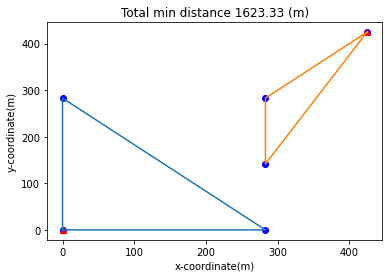

this is inside collecting time
[6, 3, 5]
#####
[0, 2, 8, 0]
this is inside collecting time
{0: [0, 2], 2: [1], 8: [3, 4, 5, 6, 7]}
this is to check for collecting time
[0, 2, 1, 4, 5, 0, 2, 0, 2]
this is inside collecting time
[7, 2, 4]
#####
[15, 10, 9, 15]
this is inside collecting time
{15: [9], 10: [8], 9: [3, 4, 5, 6, 7]}
this is to check for collecting time
[9, 8, 3, 6, 7, 9, 9]
dist[0,6]=282
dist[6,3]=400
dist[3,5]=282
dist[5,0]=0
dist[1,7]=200
dist[7,2]=141
dist[2,4]=316
dist[4,1]=0
[0, 2, 8, 0, 0]
this is temp
[0, 2, 1, 4, 5, 0, 2, 0, 2]
this is temp
[0, 2, 1, 4, 5, 0, 2, 0, 2]
this is temp
[0, 2, 1, 4, 5, 0, 2, 0, 2]
this is temp
[0, 2, 1, 4, 5, 0, 2, 0, 2]
defaultdict(<class 'list'>, {(0, 2): [0, 2, 1], (2, 8): [1, 2, 5, 4], (8, 0): [5, 4, 2, 0]})
defaultdict(<class 'list'>, {(0, 2): [0, 2, 1], (2, 8): [5, 4], (8, 0): []})
6
defaultdict(<class 'list'>, {(0, 2): [0, 2, 1], (2, 8): [5, 4], (8, 0): []})
[15, 10, 9, 15, 15]
this is temp
[9, 8, 3, 6, 7, 9, 9]
this is temp
[9, 8, 

<ipython-input-46-989841d46c2b>:21: RuntimeWarning: invalid value encountered in true_divide
  dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp



defaultdict(<class 'list'>, {0: [0, 7, 4, 5, 0], 1: [1, 6, 2, 8, 3, 1]})
this is checked
{6: [3], 15: [9], 8: [4, 5, 7], 0: [0, 2], 2: [1], 9: [6], 10: [8]}
this is checked
{6: [3], 15: [9], 8: [4, 5, 7], 0: [0, 2], 2: [1], 9: [6], 10: [8]}
this is new group
defaultdict(<class 'list'>, {0: [0, 2, 6, 4, 5, 7, 0, 2, 0, 2], 1: [9, 1, 3, 8, 9, 9]})


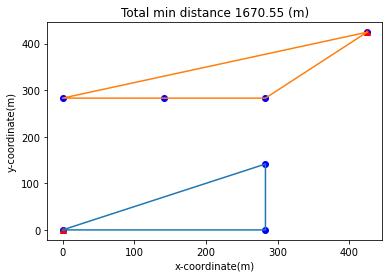

this is inside collecting time
[7, 4, 5]
#####
[0, 9, 8, 0]
this is inside collecting time
{0: [0, 2], 9: [3, 6, 7], 8: [4, 5]}
this is to check for collecting time
[0, 2, 6, 4, 5, 7, 0, 2, 0, 2]
this is inside collecting time
[6, 2, 8, 3]
#####
[15, 2, 6, 10, 15]
this is inside collecting time
{15: [9], 2: [1], 6: [3, 4, 5, 6, 7], 10: [8]}
this is to check for collecting time
[9, 1, 3, 8, 9, 9]
dist[0,7]=316
dist[7,4]=141
dist[4,5]=282
dist[5,0]=0
dist[1,6]=447
dist[6,2]=141
dist[2,8]=141
dist[8,3]=200
dist[3,1]=0
[0, 9, 8, 0, 0]
this is temp
[0, 2, 6, 4, 5, 7, 0, 2, 0, 2]
this is temp
[0, 2, 6, 4, 5, 7, 0, 2, 0, 2]
this is temp
[0, 2, 6, 4, 5, 7, 0, 2, 0, 2]
this is temp
[0, 2, 6, 4, 5, 7, 0, 2, 0, 2]
defaultdict(<class 'list'>, {(0, 9): [0, 2, 5, 4, 6, 7], (9, 8): [6, 4], (8, 0): [5, 4, 2, 0]})
defaultdict(<class 'list'>, {(0, 9): [0, 2, 5, 4, 6, 7], (9, 8): [], (8, 0): []})
7
defaultdict(<class 'list'>, {(0, 9): [0, 2, 5, 4, 6, 7], (9, 8): [], (8, 0): []})
[15, 2, 6, 10, 15, 15]
th

<ipython-input-46-989841d46c2b>:21: RuntimeWarning: invalid value encountered in true_divide
  dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp


this is subtour
defaultdict(<class 'list'>, {0: [0, 9, 5, 4, 8, 0], 1: [1, 3, 6, 2, 7, 1]})
this is checked
{6: [3], 15: [9], 8: [4, 5, 7], 4: [2], 2: [1], 10: [8], 9: [6], 0: [0]}
this is checked
{6: [3], 15: [9], 8: [4, 5, 7], 4: [2], 2: [1], 10: [8], 9: [6], 0: [0]}
this is new group
defaultdict(<class 'list'>, {0: [0, 0, 2, 4, 5, 7, 6, 0], 1: [9, 9, 1, 3, 8, 9]})


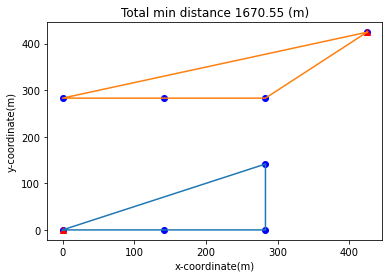

this is inside collecting time
[9, 5, 4, 8]
#####
[0, 0, 4, 8, 9]
this is inside collecting time
{0: [0], 4: [2], 8: [4, 5], 9: [3, 6, 7]}
this is to check for collecting time
[0, 0, 2, 4, 5, 7, 6, 0]
this is inside collecting time
[3, 6, 2, 7]
#####
[15, 15, 2, 6, 10]
this is inside collecting time
{15: [9], 2: [1], 6: [3, 4, 5, 6, 7], 10: [8]}
this is to check for collecting time
[9, 9, 1, 3, 8, 9]
dist[0,9]=0
dist[9,5]=141
dist[5,4]=141
dist[4,8]=141
dist[8,0]=316
dist[1,3]=0
dist[3,6]=447
dist[6,2]=141
dist[2,7]=141
dist[7,1]=200
[0, 0, 4, 8, 9, 0]
this is temp
[0, 0, 2, 4, 5, 7, 6, 0]
this is temp
[0, 0, 2, 4, 5, 7, 6, 0]
this is temp
[0, 0, 2, 4, 5, 7, 6, 0]
this is temp
[0, 0, 2, 4, 5, 7, 6, 0]
this is temp
[0, 0, 2, 4, 5, 7, 6, 0]
defaultdict(<class 'list'>, {(0, 4): [0, 2], (4, 8): [2, 5], (8, 9): [4, 6], (9, 0): [7, 6, 5, 4, 2, 0]})
defaultdict(<class 'list'>, {(0, 4): [0, 2], (4, 8): [5], (8, 9): [4, 6], (9, 0): [7]})
6
defaultdict(<class 'list'>, {(0, 4): [0, 2], (4, 8): [5

<ipython-input-46-989841d46c2b>:21: RuntimeWarning: invalid value encountered in true_divide
  dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp


this is subtour
defaultdict(<class 'list'>, {0: [0, 9, 5, 4, 8, 0], 1: [1, 3, 6, 2, 7, 1]})
this is checked
{6: [3], 15: [9], 8: [4, 5, 7], 4: [2], 2: [1], 10: [8], 9: [6], 0: [0]}
this is checked
{6: [3], 15: [9], 8: [4, 5, 7], 4: [2], 2: [1], 10: [8], 9: [6], 0: [0]}
this is new group
defaultdict(<class 'list'>, {0: [0, 0, 2, 4, 5, 7, 6, 0], 1: [9, 9, 1, 3, 8, 9]})


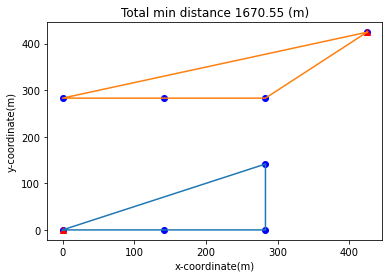

this is inside collecting time
[9, 5, 4, 8]
#####
[0, 0, 4, 8, 9]
this is inside collecting time
{0: [0], 4: [2], 8: [4, 5], 9: [3, 6, 7]}
this is to check for collecting time
[0, 0, 2, 4, 5, 7, 6, 0]
this is inside collecting time
[3, 6, 2, 7]
#####
[15, 15, 2, 6, 10]
this is inside collecting time
{15: [9], 2: [1], 6: [3, 4, 5, 6, 7], 10: [8]}
this is to check for collecting time
[9, 9, 1, 3, 8, 9]
dist[0,9]=0
dist[9,5]=141
dist[5,4]=141
dist[4,8]=141
dist[8,0]=316
dist[1,3]=0
dist[3,6]=447
dist[6,2]=141
dist[2,7]=141
dist[7,1]=200
[0, 0, 4, 8, 9, 0]
this is temp
[0, 0, 2, 4, 5, 7, 6, 0]
this is temp
[0, 0, 2, 4, 5, 7, 6, 0]
this is temp
[0, 0, 2, 4, 5, 7, 6, 0]
this is temp
[0, 0, 2, 4, 5, 7, 6, 0]
this is temp
[0, 0, 2, 4, 5, 7, 6, 0]
defaultdict(<class 'list'>, {(0, 4): [0, 2], (4, 8): [2, 5], (8, 9): [4, 6], (9, 0): [7, 6, 5, 4, 2, 0]})
defaultdict(<class 'list'>, {(0, 4): [0, 2], (4, 8): [5], (8, 9): [4, 6], (9, 0): [7]})
6
defaultdict(<class 'list'>, {(0, 4): [0, 2], (4, 8): [5

<ipython-input-46-989841d46c2b>:21: RuntimeWarning: invalid value encountered in true_divide
  dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp


     0     0     cutoff    0      1670.54814 1670.54814  0.00%     -    0s

Explored 1 nodes (353 simplex iterations) in 0.12 seconds (0.02 work units)
Thread count was 8 (of 8 available processors)

Solution count 6: 1670.55 1706.18 1823.33 ... 3322.81

Optimal solution found (tolerance 1.00e-04)
Best objective 1.670548142703e+03, best bound 1.670548142703e+03, gap 0.0000%
this is subtour
defaultdict(<class 'list'>, {0: [0, 9, 5, 4, 8, 0], 1: [1, 3, 6, 2, 7, 1]})
this is checked
{6: [3], 15: [9], 8: [4, 5, 7], 4: [2], 2: [1], 10: [8], 9: [6], 0: [0]}
this is checked
{6: [3], 15: [9], 8: [4, 5, 7], 4: [2], 2: [1], 10: [8], 9: [6], 0: [0]}
this is new group
defaultdict(<class 'list'>, {0: [0, 0, 2, 4, 5, 7, 6, 0], 1: [9, 9, 1, 3, 8, 9]})


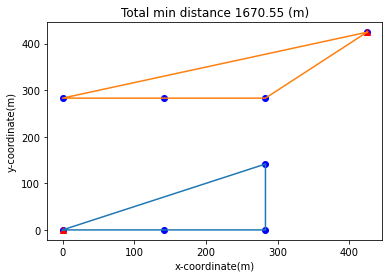

this is inside collecting time
[9, 5, 4, 8]
#####
[0, 0, 4, 8, 9]
this is inside collecting time
{0: [0], 4: [2], 8: [4, 5], 9: [3, 6, 7]}
this is to check for collecting time
[0, 0, 2, 4, 5, 7, 6, 0]
this is inside collecting time
[3, 6, 2, 7]
#####
[15, 15, 2, 6, 10]
this is inside collecting time
{15: [9], 2: [1], 6: [3, 4, 5, 6, 7], 10: [8]}
this is to check for collecting time
[9, 9, 1, 3, 8, 9]
dist[0,9]=0
dist[9,5]=141
dist[5,4]=141
dist[4,8]=141
dist[8,0]=316
dist[1,3]=0
dist[3,6]=447
dist[6,2]=141
dist[2,7]=141
dist[7,1]=200
[0, 0, 4, 8, 9, 0]
this is temp
[0, 0, 2, 4, 5, 7, 6, 0]
this is temp
[0, 0, 2, 4, 5, 7, 6, 0]
this is temp
[0, 0, 2, 4, 5, 7, 6, 0]
this is temp
[0, 0, 2, 4, 5, 7, 6, 0]
this is temp
[0, 0, 2, 4, 5, 7, 6, 0]
defaultdict(<class 'list'>, {(0, 4): [0, 2], (4, 8): [2, 5], (8, 9): [4, 6], (9, 0): [7, 6, 5, 4, 2, 0]})
defaultdict(<class 'list'>, {(0, 4): [0, 2], (4, 8): [5], (8, 9): [4, 6], (9, 0): [7]})
6
defaultdict(<class 'list'>, {(0, 4): [0, 2], (4, 8): [5

<ipython-input-46-989841d46c2b>:21: RuntimeWarning: invalid value encountered in true_divide
  dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp



{(133.5, 90.5): 5, (310.0, 295.0): 10, (273.3333333333333, 81.0): 9, (68.33333333333334, 212.66666666666666): 2}
{(133.5, 90.5): 5, (406.0, 307.0): 14, (68.33333333333334, 212.66666666666666): 2, (273.3333333333333, 81.0): 9, (214.0, 283.0): 10}
5
i am here
this is no of vehic
2

this is K value
2
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 55 rows, 104 columns and 441 nonzeros
Model fingerprint: 0x28ec7b41
Variable types: 1 continuous, 103 integer (98 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 5e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 1001715.2982
Presolve removed 1 rows and 34 columns
Presolve time: 0.00s
Presolved: 54 rows, 70 columns, 355 nonzeros
Variable types: 0 continuous, 70 integer (65 binary)

Root relaxation: objective 1.365685e+03, 29 iterations, 0

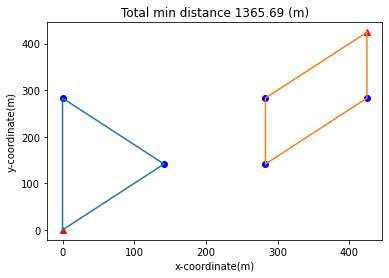

this is inside collecting time
[2, 4]
#####
[0, 5, 2]
this is inside collecting time
{0: [], 5: [0, 2, 3, 4], 2: [1]}
this is to check for collecting time
[0, 2, 3, 4, 1]
this is inside collecting time
[6, 5, 3]
#####
[15, 10, 9, 14]
this is inside collecting time
{15: [], 10: [5], 9: [6, 7, 8], 14: [9]}
this is to check for collecting time
[5, 6, 7, 8, 9]
dist[0,2]=200
dist[2,4]=200
dist[4,0]=282
dist[1,6]=200
dist[6,5]=141
dist[5,3]=200
dist[3,1]=141
[0, 5, 2, 0]
this is temp
[0, 2, 3, 4, 1]
this is temp
[0, 2, 3, 4, 1]
this is temp
[0, 2, 3, 4, 1]
defaultdict(<class 'list'>, {(0, 5): [3, 4, 0, 2], (5, 2): [3, 4, 0, 2, 1], (2, 0): [1, 0]})
defaultdict(<class 'list'>, {(0, 5): [3, 4, 0, 2], (5, 2): [1], (2, 0): []})
5
defaultdict(<class 'list'>, {(0, 5): [3, 4, 0, 2], (5, 2): [1], (2, 0): []})
[15, 10, 9, 14, 15]
this is temp
[5, 6, 7, 8, 9]
this is temp
[5, 6, 7, 8, 9]
this is temp
[5, 6, 7, 8, 9]
this is temp
[5, 6, 7, 8, 9]
defaultdict(<class 'list'>, {(15, 10): [9, 5], (10, 9): [5

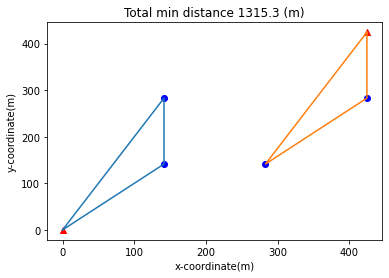

this is inside collecting time
[2, 4]
#####
[0, 5, 6]
this is inside collecting time
{0: [], 5: [0, 3, 4], 6: [1, 2, 5]}
this is to check for collecting time
[0, 3, 4, 1, 2, 5]
this is inside collecting time
[5, 3]
#####
[15, 9, 14]
this is inside collecting time
{15: [], 9: [6, 7, 8], 14: [9]}
this is to check for collecting time
[6, 7, 8, 9]
dist[0,2]=200
dist[2,4]=141
dist[4,0]=316
dist[1,5]=316
dist[5,3]=200
dist[3,1]=141
[0, 5, 6, 0]
this is temp
[0, 3, 4, 1, 2, 5]
this is temp
[0, 3, 4, 1, 2, 5]
this is temp
[0, 3, 4, 1, 2, 5]
defaultdict(<class 'list'>, {(0, 5): [3, 4, 0, 2], (5, 6): [3, 5, 1], (6, 0): [5, 1, 2, 0, 4, 3]})
defaultdict(<class 'list'>, {(0, 5): [3, 4, 0, 2], (5, 6): [5, 1], (6, 0): []})
6
defaultdict(<class 'list'>, {(0, 5): [3, 4, 0, 2], (5, 6): [5, 1], (6, 0): []})
[15, 9, 14, 15]
this is temp
[6, 7, 8, 9]
this is temp
[6, 7, 8, 9]
this is temp
[6, 7, 8, 9]
defaultdict(<class 'list'>, {(15, 9): [9, 8], (9, 14): [7, 9], (14, 15): [9]})
defaultdict(<class 'list'>,

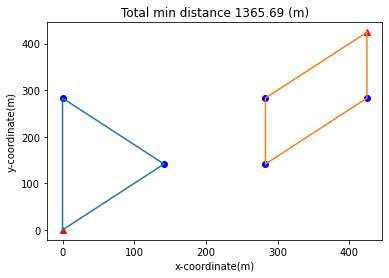

this is inside collecting time
[2, 4]
#####
[0, 5, 2]
this is inside collecting time
{0: [], 5: [0, 2, 3, 4], 2: [1]}
this is to check for collecting time
[0, 2, 3, 4, 1]
this is inside collecting time
[6, 5, 3]
#####
[15, 10, 9, 14]
this is inside collecting time
{15: [], 10: [5], 9: [6, 7, 8], 14: [9]}
this is to check for collecting time
[5, 6, 7, 8, 9]
dist[0,2]=200
dist[2,4]=200
dist[4,0]=282
dist[1,6]=200
dist[6,5]=141
dist[5,3]=200
dist[3,1]=141
[0, 5, 2, 0]
this is temp
[0, 2, 3, 4, 1]
this is temp
[0, 2, 3, 4, 1]
this is temp
[0, 2, 3, 4, 1]
defaultdict(<class 'list'>, {(0, 5): [3, 4, 0, 2], (5, 2): [3, 4, 0, 2, 1], (2, 0): [1, 0]})
defaultdict(<class 'list'>, {(0, 5): [3, 4, 0, 2], (5, 2): [1], (2, 0): []})
5
defaultdict(<class 'list'>, {(0, 5): [3, 4, 0, 2], (5, 2): [1], (2, 0): []})
[15, 10, 9, 14, 15]
this is temp
[5, 6, 7, 8, 9]
this is temp
[5, 6, 7, 8, 9]
this is temp
[5, 6, 7, 8, 9]
this is temp
[5, 6, 7, 8, 9]
defaultdict(<class 'list'>, {(15, 10): [9, 5], (10, 9): [5

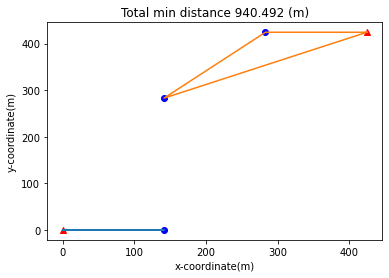

this is inside collecting time
[2]
#####
[0, 4]
this is inside collecting time
{0: [], 4: [3, 4]}
this is to check for collecting time
[3, 4]
this is inside collecting time
[3, 4]
#####
[15, 11, 6]
this is inside collecting time
{15: [8, 9], 11: [6, 7], 6: [0, 1, 2, 5]}
this is to check for collecting time
[6, 7, 8, 9, 0, 1, 2, 5]
dist[0,2]=141
dist[2,0]=141
dist[1,3]=141
dist[3,4]=200
dist[4,1]=316
[0, 4, 0]
this is temp
[3, 4]
this is temp
[3, 4]
defaultdict(<class 'list'>, {(0, 4): [3], (4, 0): [3]})
defaultdict(<class 'list'>, {(0, 4): [3], (4, 0): []})
1
defaultdict(<class 'list'>, {(0, 4): [3], (4, 0): []})
[15, 11, 6, 15]
this is temp
[6, 7, 8, 9, 0, 1, 2, 5]
this is temp
[6, 7, 8, 9, 0, 1, 2, 5]
this is temp
[6, 7, 8, 9, 0, 1, 2, 5]
defaultdict(<class 'list'>, {(15, 11): [9, 7, 6], (11, 6): [7, 6, 5, 2], (6, 15): [5, 6, 7, 8, 9]})
defaultdict(<class 'list'>, {(15, 11): [9, 7, 6], (11, 6): [5, 2], (6, 15): [8]})
7
defaultdict(<class 'list'>, {(15, 11): [9, 7, 6], (11, 6): [5, 2]

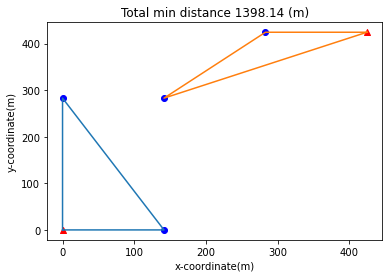

this is inside collecting time
[2, 4]
#####
[0, 4, 2]
this is inside collecting time
{0: [], 4: [3, 4], 2: [0, 1, 2]}
this is to check for collecting time
[3, 4, 0, 1, 2]
this is inside collecting time
[5, 3]
#####
[15, 6, 11]
this is inside collecting time
{15: [8, 9], 6: [0, 1, 2, 5], 11: [6, 7]}
this is to check for collecting time
[5, 6, 7, 8, 9]
dist[0,2]=141
dist[2,4]=316
dist[4,0]=282
dist[1,5]=316
dist[5,3]=200
dist[3,1]=141
[0, 4, 2, 0]
this is temp
[3, 4, 0, 1, 2]
this is temp
[3, 4, 0, 1, 2]
this is temp
[3, 4, 0, 1, 2]
defaultdict(<class 'list'>, {(0, 4): [3], (4, 2): [4, 3, 0, 1], (2, 0): [1, 0]})
defaultdict(<class 'list'>, {(0, 4): [3], (4, 2): [4, 0, 1], (2, 0): []})
4
defaultdict(<class 'list'>, {(0, 4): [3], (4, 2): [4, 0, 1], (2, 0): []})
[15, 6, 11, 15]
this is temp
[5, 6, 7, 8, 9]
this is temp
[5, 6, 7, 8, 9]
this is temp
[5, 6, 7, 8, 9]
defaultdict(<class 'list'>, {(15, 6): [9, 7, 6, 8, 5], (6, 11): [5, 6, 7], (11, 15): [6, 7, 9]})
defaultdict(<class 'list'>, {(15

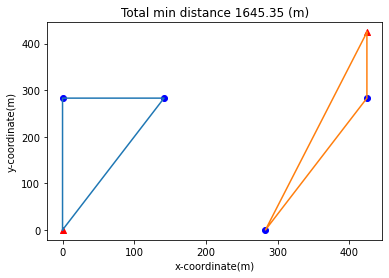

this is inside collecting time
[5, 2]
#####
[0, 2, 6]
this is inside collecting time
{0: [], 2: [0], 6: [1, 2, 3]}
this is to check for collecting time
[0, 1, 2, 3]
this is inside collecting time
[4, 3]
#####
[15, 14, 8]
this is inside collecting time
{15: [], 14: [8, 9], 8: [4, 5, 6, 7]}
this is to check for collecting time
[8, 9, 4, 5, 6, 7]
dist[0,5]=282
dist[5,2]=141
dist[2,0]=316
dist[1,4]=141
dist[4,3]=316
dist[3,1]=447
[0, 2, 6, 0]
this is temp
[0, 1, 2, 3]
this is temp
[0, 1, 2, 3]
this is temp
[0, 1, 2, 3]
defaultdict(<class 'list'>, {(0, 2): [0], (2, 6): [0, 1, 2, 3], (6, 0): [3, 1]})
defaultdict(<class 'list'>, {(0, 2): [0], (2, 6): [1, 2, 3], (6, 0): []})
4
defaultdict(<class 'list'>, {(0, 2): [0], (2, 6): [1, 2, 3], (6, 0): []})
[15, 14, 8, 15]
this is temp
[8, 9, 4, 5, 6, 7]
this is temp
[8, 9, 4, 5, 6, 7]
this is temp
[8, 9, 4, 5, 6, 7]
defaultdict(<class 'list'>, {(15, 14): [9, 8], (14, 8): [9, 8, 6, 7, 5, 4], (8, 15): [5, 4, 7, 6, 8, 9]})
defaultdict(<class 'list'>, {(

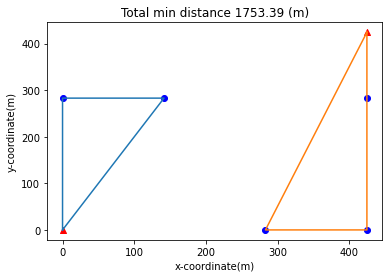

this is inside collecting time
[5, 2]
#####
[0, 2, 6]
this is inside collecting time
{0: [], 2: [0], 6: [1, 2, 3]}
this is to check for collecting time
[0, 1, 2, 3]
this is inside collecting time
[6, 3, 4]
#####
[15, 8, 12, 14]
this is inside collecting time
{15: [], 8: [4, 5, 6], 12: [7], 14: [8, 9]}
this is to check for collecting time
[4, 5, 6, 7, 8, 9]
dist[0,5]=282
dist[5,2]=141
dist[2,0]=316
dist[1,6]=447
dist[6,3]=141
dist[3,4]=282
dist[4,1]=141
[0, 2, 6, 0]
this is temp
[0, 1, 2, 3]
this is temp
[0, 1, 2, 3]
this is temp
[0, 1, 2, 3]
defaultdict(<class 'list'>, {(0, 2): [0], (2, 6): [0, 1, 2, 3], (6, 0): [3, 1]})
defaultdict(<class 'list'>, {(0, 2): [0], (2, 6): [1, 2, 3], (6, 0): []})
4
defaultdict(<class 'list'>, {(0, 2): [0], (2, 6): [1, 2, 3], (6, 0): []})
[15, 8, 12, 14, 15]
this is temp
[4, 5, 6, 7, 8, 9]
this is temp
[4, 5, 6, 7, 8, 9]
this is temp
[4, 5, 6, 7, 8, 9]
this is temp
[4, 5, 6, 7, 8, 9]
defaultdict(<class 'list'>, {(15, 8): [9, 8, 6, 4, 5, 7], (8, 12): [4, 7]

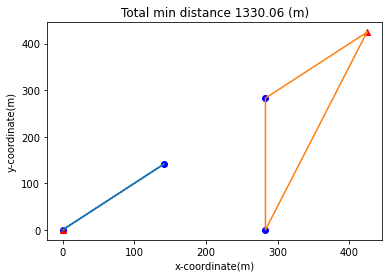

this is inside collecting time
[5, 3]
#####
[0, 5, 0]
this is inside collecting time
{0: [0], 5: [1, 2, 4, 5]}
this is to check for collecting time
[0, 1, 2, 4, 5, 0, 0]
this is inside collecting time
[4, 2]
#####
[15, 8, 10]
this is inside collecting time
{15: [], 8: [9], 10: [3, 6, 7, 8]}
this is to check for collecting time
[9, 3, 6, 7, 8]
dist[0,5]=200
dist[5,3]=200
dist[3,0]=0
dist[1,4]=447
dist[4,2]=282
dist[2,1]=200
[0, 5, 0, 0]
this is temp
[0, 1, 2, 4, 5, 0, 0]
this is temp
[0, 1, 2, 4, 5, 0, 0]
this is temp
[0, 1, 2, 4, 5, 0, 0]
defaultdict(<class 'list'>, {(0, 5): [0, 2, 1, 4], (5, 0): [4, 1, 2, 0]})
defaultdict(<class 'list'>, {(0, 5): [0, 2, 1, 4], (5, 0): []})
4
defaultdict(<class 'list'>, {(0, 5): [0, 2, 1, 4], (5, 0): []})
[15, 8, 10, 15]
this is temp
[9, 3, 6, 7, 8]
this is temp
[9, 3, 6, 7, 8]
this is temp
[9, 3, 6, 7, 8]
defaultdict(<class 'list'>, {(15, 8): [7, 8, 6, 9], (8, 10): [9, 6, 8, 3, 7], (10, 15): [6, 7]})
defaultdict(<class 'list'>, {(15, 8): [7, 8, 6, 9],

<ipython-input-46-989841d46c2b>:21: RuntimeWarning: invalid value encountered in true_divide
  dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp


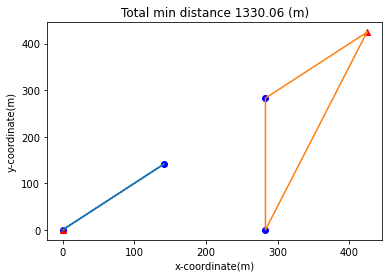

this is inside collecting time
[2, 5]
#####
[0, 0, 5]
this is inside collecting time
{0: [0], 5: [1, 2, 4, 5]}
this is to check for collecting time
[0, 0, 1, 2, 4, 5, 0]
this is inside collecting time
[3, 4]
#####
[15, 8, 10]
this is inside collecting time
{15: [], 8: [9], 10: [3, 6, 7, 8]}
this is to check for collecting time
[9, 3, 6, 7, 8]
dist[0,2]=0
dist[2,5]=200
dist[5,0]=200
dist[1,3]=447
dist[3,4]=282
dist[4,1]=200
[0, 0, 5, 0]
this is temp
[0, 0, 1, 2, 4, 5, 0]
this is temp
[0, 0, 1, 2, 4, 5, 0]
this is temp
[0, 0, 1, 2, 4, 5, 0]
defaultdict(<class 'list'>, {(0, 5): [0, 2, 1, 4], (5, 0): [4, 1, 2, 0]})
defaultdict(<class 'list'>, {(0, 5): [0, 2, 1, 4], (5, 0): []})
4
defaultdict(<class 'list'>, {(0, 5): [0, 2, 1, 4], (5, 0): []})
[15, 8, 10, 15]
this is temp
[9, 3, 6, 7, 8]
this is temp
[9, 3, 6, 7, 8]
this is temp
[9, 3, 6, 7, 8]
defaultdict(<class 'list'>, {(15, 8): [7, 8, 6, 9], (8, 10): [9, 6, 8, 3, 7], (10, 15): [6, 7]})
defaultdict(<class 'list'>, {(15, 8): [7, 8, 6, 9],

<ipython-input-46-989841d46c2b>:21: RuntimeWarning: invalid value encountered in true_divide
  dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp


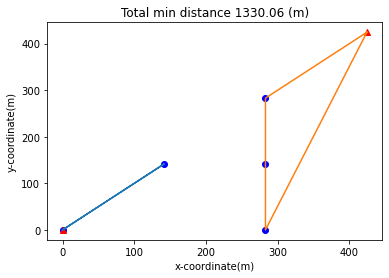

this is inside collecting time
[3, 4]
#####
[0, 5, 0]
this is inside collecting time
{0: [0], 5: [1, 2, 4, 5]}
this is to check for collecting time
[0, 1, 2, 4, 0, 0]
this is inside collecting time
[2, 6, 5]
#####
[15, 10, 9, 8]
this is inside collecting time
{15: [], 10: [3, 6, 7, 8], 9: [2, 4, 5], 8: [9]}
this is to check for collecting time
[3, 6, 7, 8, 5, 9]
dist[0,3]=200
dist[3,4]=200
dist[4,0]=0
dist[1,2]=200
dist[2,6]=141
dist[6,5]=141
dist[5,1]=447
[0, 5, 0, 0]
this is temp
[0, 1, 2, 4, 0, 0]
this is temp
[0, 1, 2, 4, 0, 0]
this is temp
[0, 1, 2, 4, 0, 0]
defaultdict(<class 'list'>, {(0, 5): [0, 2, 1, 4], (5, 0): [4, 1, 2, 0]})
defaultdict(<class 'list'>, {(0, 5): [0, 2, 1, 4], (5, 0): []})
4
defaultdict(<class 'list'>, {(0, 5): [0, 2, 1, 4], (5, 0): []})
[15, 10, 9, 8, 15]
this is temp
[3, 6, 7, 8, 5, 9]
this is temp
[3, 6, 7, 8, 5, 9]
this is temp
[3, 6, 7, 8, 5, 9]
this is temp
[3, 6, 7, 8, 5, 9]
defaultdict(<class 'list'>, {(15, 10): [7, 8], (10, 9): [7, 3, 5], (9, 8): [5, 

<ipython-input-46-989841d46c2b>:21: RuntimeWarning: invalid value encountered in true_divide
  dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp


this is subtour
defaultdict(<class 'list'>, {0: [0, 5, 7, 3, 0], 1: [1, 2, 4, 6, 1]})
this is checked
{6: [3], 0: [0], 9: [5, 6, 8], 5: [1, 2, 4], 1: [], 10: [7], 8: [9]}
this is checked
{6: [3], 0: [0], 9: [5, 6, 8], 5: [1, 2, 4], 1: [], 10: [7], 8: [9]}
this is new group
defaultdict(<class 'list'>, {0: [0, 1, 2, 4, 9, 0, 0], 1: [3, 5, 6, 8, 7]})


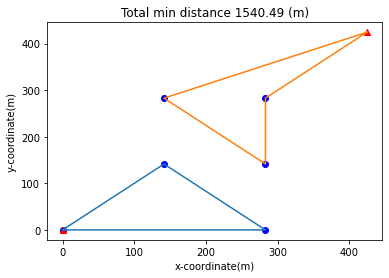

this is inside collecting time
[5, 7, 3]
#####
[0, 5, 8, 0]
this is inside collecting time
{0: [0], 5: [1, 2, 4, 5], 8: [9]}
this is to check for collecting time
[0, 1, 2, 4, 9, 0, 0]
this is inside collecting time
[2, 4, 6]
#####
[15, 6, 9, 10]
this is inside collecting time
{15: [], 6: [3], 9: [2, 4, 5, 6, 8], 10: [7]}
this is to check for collecting time
[3, 5, 6, 8, 7]
dist[0,5]=200
dist[5,7]=200
dist[7,3]=282
dist[3,0]=0
dist[1,2]=316
dist[2,4]=200
dist[4,6]=141
dist[6,1]=200
[0, 5, 8, 0, 0]
this is temp
[0, 1, 2, 4, 9, 0, 0]
this is temp
[0, 1, 2, 4, 9, 0, 0]
this is temp
[0, 1, 2, 4, 9, 0, 0]
this is temp
[0, 1, 2, 4, 9, 0, 0]
defaultdict(<class 'list'>, {(0, 5): [0, 2, 1, 4], (5, 8): [2, 4, 9], (8, 0): [9, 2, 0]})
defaultdict(<class 'list'>, {(0, 5): [0, 2, 1, 4], (5, 8): [9], (8, 0): []})
5
defaultdict(<class 'list'>, {(0, 5): [0, 2, 1, 4], (5, 8): [9], (8, 0): []})
[15, 6, 9, 10, 15]
this is temp
[3, 5, 6, 8, 7]
this is temp
[3, 5, 6, 8, 7]
this is temp
[3, 5, 6, 8, 7]
this i

<ipython-input-46-989841d46c2b>:21: RuntimeWarning: invalid value encountered in true_divide
  dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp


this is subtour
defaultdict(<class 'list'>, {0: [0, 5, 7, 3, 0], 1: [1, 2, 4, 6, 1]})
this is checked
{6: [3], 0: [0], 9: [5, 6, 8], 5: [1, 2, 4], 1: [], 10: [7], 8: [9]}
this is checked
{6: [3], 0: [0], 9: [5, 6, 8], 5: [1, 2, 4], 1: [], 10: [7], 8: [9]}
this is new group
defaultdict(<class 'list'>, {0: [0, 1, 2, 4, 9, 0, 0], 1: [3, 5, 6, 8, 7]})


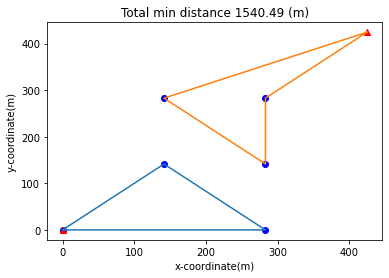

this is inside collecting time
[5, 7, 3]
#####
[0, 5, 8, 0]
this is inside collecting time
{0: [0], 5: [1, 2, 4, 5], 8: [9]}
this is to check for collecting time
[0, 1, 2, 4, 9, 0, 0]
this is inside collecting time
[2, 4, 6]
#####
[15, 6, 9, 10]
this is inside collecting time
{15: [], 6: [3], 9: [2, 4, 5, 6, 8], 10: [7]}
this is to check for collecting time
[3, 5, 6, 8, 7]
dist[0,5]=200
dist[5,7]=200
dist[7,3]=282
dist[3,0]=0
dist[1,2]=316
dist[2,4]=200
dist[4,6]=141
dist[6,1]=200
[0, 5, 8, 0, 0]
this is temp
[0, 1, 2, 4, 9, 0, 0]
this is temp
[0, 1, 2, 4, 9, 0, 0]
this is temp
[0, 1, 2, 4, 9, 0, 0]
this is temp
[0, 1, 2, 4, 9, 0, 0]
defaultdict(<class 'list'>, {(0, 5): [0, 2, 1, 4], (5, 8): [2, 4, 9], (8, 0): [9, 2, 0]})
defaultdict(<class 'list'>, {(0, 5): [0, 2, 1, 4], (5, 8): [9], (8, 0): []})
5
defaultdict(<class 'list'>, {(0, 5): [0, 2, 1, 4], (5, 8): [9], (8, 0): []})
[15, 6, 9, 10, 15]
this is temp
[3, 5, 6, 8, 7]
this is temp
[3, 5, 6, 8, 7]
this is temp
[3, 5, 6, 8, 7]
this i

<ipython-input-46-989841d46c2b>:21: RuntimeWarning: invalid value encountered in true_divide
  dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp


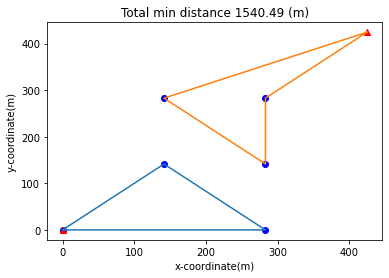

this is inside collecting time
[5, 7, 3]
#####
[0, 5, 8, 0]
this is inside collecting time
{0: [0], 5: [1, 2, 4, 5], 8: [9]}
this is to check for collecting time
[0, 1, 2, 4, 9, 0, 0]
this is inside collecting time
[2, 4, 6]
#####
[15, 6, 9, 10]
this is inside collecting time
{15: [], 6: [3], 9: [2, 4, 5, 6, 8], 10: [7]}
this is to check for collecting time
[3, 5, 6, 8, 7]
dist[0,5]=200
dist[5,7]=200
dist[7,3]=282
dist[3,0]=0
dist[1,2]=316
dist[2,4]=200
dist[4,6]=141
dist[6,1]=200
[0, 5, 8, 0, 0]
this is temp
[0, 1, 2, 4, 9, 0, 0]
this is temp
[0, 1, 2, 4, 9, 0, 0]
this is temp
[0, 1, 2, 4, 9, 0, 0]
this is temp
[0, 1, 2, 4, 9, 0, 0]
defaultdict(<class 'list'>, {(0, 5): [0, 2, 1, 4], (5, 8): [2, 4, 9], (8, 0): [9, 2, 0]})
defaultdict(<class 'list'>, {(0, 5): [0, 2, 1, 4], (5, 8): [9], (8, 0): []})
5
defaultdict(<class 'list'>, {(0, 5): [0, 2, 1, 4], (5, 8): [9], (8, 0): []})
[15, 6, 9, 10, 15]
this is temp
[3, 5, 6, 8, 7]
this is temp
[3, 5, 6, 8, 7]
this is temp
[3, 5, 6, 8, 7]
this i

<ipython-input-46-989841d46c2b>:21: RuntimeWarning: invalid value encountered in true_divide
  dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp


{(103.0, 343.5): 6, (218.33333333333331, 83.66666666666667): 9, (356.5, 32.0): 12, (61.33333333333334, 102.66666666666667): 1}
{(79.0, 226.0): 6, (218.33333333333331, 83.66666666666667): 9, (98.0, 409.0): 7, (67.0, 67.0): 0, (356.5, 32.0): 12}
{(67.0, 67.0): 0, (175.0, 25.0): 4, (98.0, 409.0): 7, (356.5, 32.0): 12, (240.0, 113.0): 9, (79.0, 226.0): 6}
6
i am here
this is no of vehic
2

this is K value
3
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 71 rows, 135 columns and 623 nonzeros
Model fingerprint: 0x01e25777
Variable types: 1 continuous, 134 integer (128 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 6e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 2679.1246264
Presolve removed 1 rows and 45 columns
Presolve time: 0.00s
Presolved: 70 rows, 90 columns, 504 nonzeros
Var

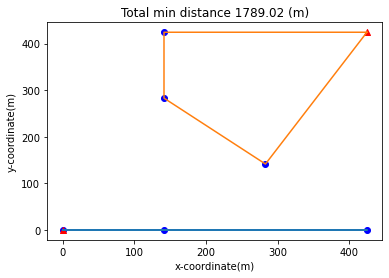

this is inside collecting time
[2, 5, 3]
#####
[0, 0, 12, 4]
this is inside collecting time
{0: [0, 1, 2], 12: [9], 4: [5]}
this is to check for collecting time
[0, 1, 2, 0, 1, 2, 9, 5, 0, 1, 2]
this is inside collecting time
[6, 7, 4]
#####
[15, 9, 6, 7]
this is inside collecting time
{15: [], 9: [6, 7, 8], 6: [4], 7: [3]}
this is to check for collecting time
[6, 7, 8, 4, 3]
dist[0,2]=0
dist[2,5]=424
dist[5,3]=282
dist[3,0]=141
dist[1,6]=316
dist[6,7]=200
dist[7,4]=141
dist[4,1]=282
[0, 0, 12, 4, 0]
this is temp
[0, 1, 2, 0, 1, 2, 9, 5, 0, 1, 2]
this is temp
[0, 1, 2, 0, 1, 2, 9, 5, 0, 1, 2]
this is temp
[0, 1, 2, 0, 1, 2, 9, 5, 0, 1, 2]
this is temp
[0, 1, 2, 0, 1, 2, 9, 5, 0, 1, 2]
defaultdict(<class 'list'>, {(0, 12): [1, 2, 5, 9], (12, 4): [9, 5], (4, 0): [5, 1]})
defaultdict(<class 'list'>, {(0, 12): [1, 2, 5, 9], (12, 4): [], (4, 0): []})
4
defaultdict(<class 'list'>, {(0, 12): [1, 2, 5, 9], (12, 4): [], (4, 0): []})
[15, 9, 6, 7, 15]
this is temp
[6, 7, 8, 4, 3]
this is temp
[6

<ipython-input-46-989841d46c2b>:21: RuntimeWarning: invalid value encountered in true_divide
  dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp


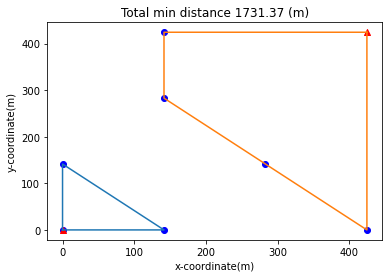

this is inside collecting time
[2, 8, 5]
#####
[0, 1, 4, 0]
this is inside collecting time
{0: [2], 1: [0, 1], 4: [5]}
this is to check for collecting time
[2, 0, 1, 5, 2, 2]
this is inside collecting time
[6, 3, 7, 4]
#####
[15, 12, 9, 6, 7]
this is inside collecting time
{15: [], 12: [9], 9: [6, 7, 8], 6: [4], 7: [3]}
this is to check for collecting time
[9, 6, 7, 8, 4, 3]
dist[0,2]=141
dist[2,8]=200
dist[8,5]=141
dist[5,0]=0
dist[1,6]=424
dist[6,3]=200
dist[3,7]=200
dist[7,4]=141
dist[4,1]=282
[0, 1, 4, 0, 0]
this is temp
[2, 0, 1, 5, 2, 2]
this is temp
[2, 0, 1, 5, 2, 2]
this is temp
[2, 0, 1, 5, 2, 2]
this is temp
[2, 0, 1, 5, 2, 2]
defaultdict(<class 'list'>, {(0, 1): [2, 0], (1, 4): [0, 1, 2, 5], (4, 0): [5, 1]})
defaultdict(<class 'list'>, {(0, 1): [2, 0], (1, 4): [1, 5], (4, 0): []})
4
defaultdict(<class 'list'>, {(0, 1): [2, 0], (1, 4): [1, 5], (4, 0): []})
[15, 12, 9, 6, 7, 15]
this is temp
[9, 6, 7, 8, 4, 3]
this is temp
[9, 6, 7, 8, 4, 3]
this is temp
[9, 6, 7, 8, 4, 3]
th

<ipython-input-46-989841d46c2b>:21: RuntimeWarning: invalid value encountered in true_divide
  dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp



{(147.0, 318.0): 6, (398.0, 184.0): 13, (240.0, 64.66666666666669): 8, (418.0, 404.0): 15, (46.33333333333334, 231.66666666666666): 2}
{(147.0, 318.0): 6, (398.0, 184.0): 13, (269.5, 39.5): 8, (418.0, 404.0): 15, (46.33333333333334, 231.66666666666666): 2, (181.0, 115.0): 5}
6
i am here
this is no of vehic
2

this is K value
3
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 71 rows, 135 columns and 623 nonzeros
Model fingerprint: 0x022b0b98
Variable types: 1 continuous, 134 integer (128 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 6e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 2187.7054303
Presolve removed 1 rows and 45 columns
Presolve time: 0.00s
Presolved: 70 rows, 90 columns, 504 nonzeros
Variable types: 0 continuous, 90 integer (84 binary)

Root relaxation: objective

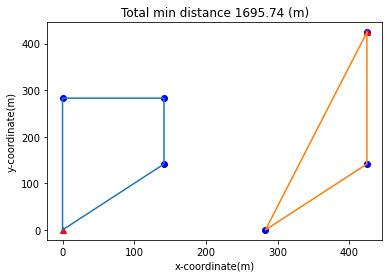

this is inside collecting time
[6, 2, 7]
#####
[0, 2, 6, 5]
this is inside collecting time
{0: [], 2: [0, 1, 2], 6: [3, 5], 5: [4]}
this is to check for collecting time
[0, 1, 2, 3, 5, 4]
this is inside collecting time
[3, 4, 5]
#####
[15, 13, 8, 15]
this is inside collecting time
{15: [9], 13: [8], 8: [6, 7]}
this is to check for collecting time
[9, 8, 6, 7, 9, 9]
dist[0,6]=282
dist[6,2]=141
dist[2,7]=141
dist[7,0]=200
dist[1,3]=282
dist[3,4]=200
dist[4,5]=447
dist[5,1]=0
[0, 2, 6, 5, 0]
this is temp
[0, 1, 2, 3, 5, 4]
this is temp
[0, 1, 2, 3, 5, 4]
this is temp
[0, 1, 2, 3, 5, 4]
this is temp
[0, 1, 2, 3, 5, 4]
defaultdict(<class 'list'>, {(0, 2): [2, 0, 1], (2, 6): [0, 2, 3, 5], (6, 5): [3, 5, 1, 2], (5, 0): [4]})
defaultdict(<class 'list'>, {(0, 2): [2, 0, 1], (2, 6): [3, 5], (6, 5): [], (5, 0): [4]})
7
defaultdict(<class 'list'>, {(0, 2): [2, 0, 1], (2, 6): [3, 5], (6, 5): [], (5, 0): [4]})
[15, 13, 8, 15, 15]
this is temp
[9, 8, 6, 7, 9, 9]
this is temp
[9, 8, 6, 7, 9, 9]
this i

<ipython-input-46-989841d46c2b>:21: RuntimeWarning: invalid value encountered in true_divide
  dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp


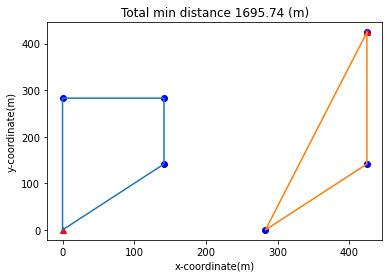

this is inside collecting time
[6, 2, 7]
#####
[0, 2, 6, 5]
this is inside collecting time
{0: [], 2: [0, 1, 2], 6: [3, 5], 5: [4]}
this is to check for collecting time
[0, 1, 2, 3, 5, 4]
this is inside collecting time
[3, 4, 5]
#####
[15, 13, 8, 15]
this is inside collecting time
{15: [9], 13: [8], 8: [6, 7]}
this is to check for collecting time
[9, 8, 6, 7, 9, 9]
dist[0,6]=282
dist[6,2]=141
dist[2,7]=141
dist[7,0]=200
dist[1,3]=282
dist[3,4]=200
dist[4,5]=447
dist[5,1]=0
[0, 2, 6, 5, 0]
this is temp
[0, 1, 2, 3, 5, 4]
this is temp
[0, 1, 2, 3, 5, 4]
this is temp
[0, 1, 2, 3, 5, 4]
this is temp
[0, 1, 2, 3, 5, 4]
defaultdict(<class 'list'>, {(0, 2): [2, 0, 1], (2, 6): [0, 2, 3, 5], (6, 5): [3, 5, 1, 2], (5, 0): [4]})
defaultdict(<class 'list'>, {(0, 2): [2, 0, 1], (2, 6): [3, 5], (6, 5): [], (5, 0): [4]})
7
defaultdict(<class 'list'>, {(0, 2): [2, 0, 1], (2, 6): [3, 5], (6, 5): [], (5, 0): [4]})
[15, 13, 8, 15, 15]
this is temp
[9, 8, 6, 7, 9, 9]
this is temp
[9, 8, 6, 7, 9, 9]
this i

<ipython-input-46-989841d46c2b>:21: RuntimeWarning: invalid value encountered in true_divide
  dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp


this is subtour
defaultdict(<class 'list'>, {0: [0, 6, 2, 7, 0], 1: [1, 3, 4, 5, 1]})
this is checked
{6: [2, 3, 5], 13: [8], 8: [6, 7], 15: [9], 2: [0, 1], 5: [4], 9: []}
this is checked
{6: [2, 3, 5], 13: [8], 8: [6, 7], 15: [9], 2: [0, 1], 5: [4], 9: []}
this is new group
defaultdict(<class 'list'>, {0: [0, 1, 2, 3, 5, 4], 1: [9, 8, 6, 7, 9, 9]})


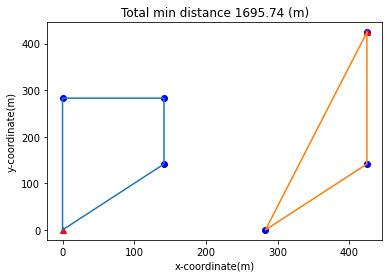

this is inside collecting time
[6, 2, 7]
#####
[0, 2, 6, 5]
this is inside collecting time
{0: [], 2: [0, 1, 2], 6: [3, 5], 5: [4]}
this is to check for collecting time
[0, 1, 2, 3, 5, 4]
this is inside collecting time
[3, 4, 5]
#####
[15, 13, 8, 15]
this is inside collecting time
{15: [9], 13: [8], 8: [6, 7]}
this is to check for collecting time
[9, 8, 6, 7, 9, 9]
dist[0,6]=282
dist[6,2]=141
dist[2,7]=141
dist[7,0]=200
dist[1,3]=282
dist[3,4]=200
dist[4,5]=447
dist[5,1]=0
[0, 2, 6, 5, 0]
this is temp
[0, 1, 2, 3, 5, 4]
this is temp
[0, 1, 2, 3, 5, 4]
this is temp
[0, 1, 2, 3, 5, 4]
this is temp
[0, 1, 2, 3, 5, 4]
defaultdict(<class 'list'>, {(0, 2): [2, 0, 1], (2, 6): [0, 2, 3, 5], (6, 5): [3, 5, 1, 2], (5, 0): [4]})
defaultdict(<class 'list'>, {(0, 2): [2, 0, 1], (2, 6): [3, 5], (6, 5): [], (5, 0): [4]})
7
defaultdict(<class 'list'>, {(0, 2): [2, 0, 1], (2, 6): [3, 5], (6, 5): [], (5, 0): [4]})
[15, 13, 8, 15, 15]
this is temp
[9, 8, 6, 7, 9, 9]
this is temp
[9, 8, 6, 7, 9, 9]
this i

<ipython-input-46-989841d46c2b>:21: RuntimeWarning: invalid value encountered in true_divide
  dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp


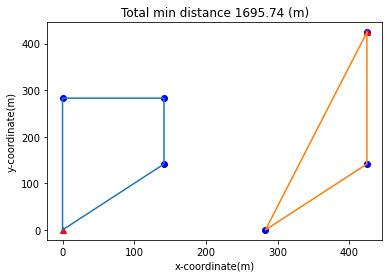

this is inside collecting time
[6, 2, 7]
#####
[0, 2, 6, 5]
this is inside collecting time
{0: [], 2: [0, 1, 2], 6: [3, 5], 5: [4]}
this is to check for collecting time
[0, 1, 2, 3, 5, 4]
this is inside collecting time
[3, 4, 5]
#####
[15, 13, 8, 15]
this is inside collecting time
{15: [9], 13: [8], 8: [6, 7]}
this is to check for collecting time
[9, 8, 6, 7, 9, 9]
dist[0,6]=282
dist[6,2]=141
dist[2,7]=141
dist[7,0]=200
dist[1,3]=282
dist[3,4]=200
dist[4,5]=447
dist[5,1]=0
[0, 2, 6, 5, 0]
this is temp
[0, 1, 2, 3, 5, 4]
this is temp
[0, 1, 2, 3, 5, 4]
this is temp
[0, 1, 2, 3, 5, 4]
this is temp
[0, 1, 2, 3, 5, 4]
defaultdict(<class 'list'>, {(0, 2): [2, 0, 1], (2, 6): [0, 2, 3, 5], (6, 5): [3, 5, 1, 2], (5, 0): [4]})
defaultdict(<class 'list'>, {(0, 2): [2, 0, 1], (2, 6): [3, 5], (6, 5): [], (5, 0): [4]})
7
defaultdict(<class 'list'>, {(0, 2): [2, 0, 1], (2, 6): [3, 5], (6, 5): [], (5, 0): [4]})
[15, 13, 8, 15, 15]
this is temp
[9, 8, 6, 7, 9, 9]
this is temp
[9, 8, 6, 7, 9, 9]
this i

<ipython-input-46-989841d46c2b>:21: RuntimeWarning: invalid value encountered in true_divide
  dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp


this is subtour
defaultdict(<class 'list'>, {0: [0, 8, 6, 2, 7, 0], 1: [1, 5, 3, 4, 1]})
this is checked
{6: [3, 5], 13: [8], 8: [6, 7], 15: [9], 2: [0, 1], 5: [4], 9: [], 1: [2]}
this is checked
{6: [3, 5], 13: [8], 8: [6, 7], 15: [9], 2: [0, 1], 5: [4], 9: [], 1: [2]}
this is new group
defaultdict(<class 'list'>, {0: [2, 0, 1, 3, 5, 4], 1: [9, 9, 8, 6, 7, 9]})


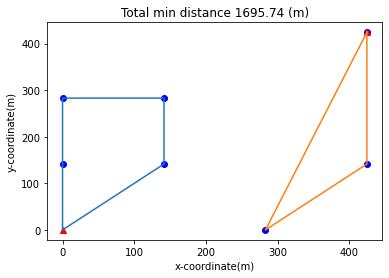

this is inside collecting time
[8, 6, 2, 7]
#####
[0, 1, 2, 6, 5]
this is inside collecting time
{0: [], 1: [2], 2: [0, 1], 6: [3, 5], 5: [4]}
this is to check for collecting time
[2, 0, 1, 3, 5, 4]
this is inside collecting time
[5, 3, 4]
#####
[15, 15, 13, 8]
this is inside collecting time
{15: [9], 13: [8], 8: [6, 7]}
this is to check for collecting time
[9, 9, 8, 6, 7, 9]
dist[0,8]=141
dist[8,6]=141
dist[6,2]=141
dist[2,7]=141
dist[7,0]=200
dist[1,5]=0
dist[5,3]=282
dist[3,4]=200
dist[4,1]=447
[0, 1, 2, 6, 5, 0]
this is temp
[2, 0, 1, 3, 5, 4]
this is temp
[2, 0, 1, 3, 5, 4]
this is temp
[2, 0, 1, 3, 5, 4]
this is temp
[2, 0, 1, 3, 5, 4]
this is temp
[2, 0, 1, 3, 5, 4]
defaultdict(<class 'list'>, {(1, 2): [2, 0, 1], (2, 6): [0, 2, 3, 5], (6, 5): [3, 5, 1, 2], (5, 0): [4]})
defaultdict(<class 'list'>, {(1, 2): [2, 0, 1], (2, 6): [3, 5], (6, 5): [], (5, 0): [4]})
6
defaultdict(<class 'list'>, {(1, 2): [2, 0, 1], (2, 6): [3, 5], (6, 5): [], (5, 0): [4]})
[15, 15, 13, 8, 15]
this is te

<ipython-input-46-989841d46c2b>:21: RuntimeWarning: invalid value encountered in true_divide
  dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp


{(226.5, 181.7): 9}
{(157.0, 233.66666666666666): 6, (330.75, 103.75): 9}
{(71.0, 272.0): 6, (221.0, 214.8): 10, (339.3333333333333, 66.33333333333334): 8}
{(230.0, 0.0): 8, (221.0, 214.8): 10, (394.0, 99.5): 13, (71.0, 272.0): 6}
{(137.66666666666669, 182.33333333333334): 5, (394.0, 99.5): 13, (63.0, 340.0): 2, (257.0, 243.66666666666666): 10, (230.0, 0.0): 8}
{(167.0, 171.5): 5, (257.0, 243.66666666666666): 10, (394.0, 99.5): 13, (63.0, 340.0): 2, (230.0, 0.0): 8, (79.0, 204.0): 5}
{(167.0, 171.5): 5, (257.0, 243.66666666666666): 10, (414.0, 149.0): 13, (63.0, 340.0): 2, (230.0, 0.0): 8, (79.0, 204.0): 5, (374.0, 50.0): 12}
7
i am here
this is no of vehic
2

this is K value
3
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 71 rows, 135 columns and 625 nonzeros
Model fingerprint: 0x3160b396
Variable types: 1 continuous, 134 integer (128 binary)
Coefficient statistics:
  Matrix rang

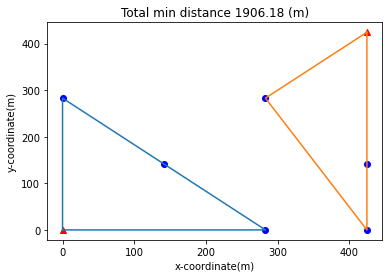

this is inside collecting time
[6, 2, 5]
#####
[0, 8, 5, 2]
this is inside collecting time
{0: [], 8: [4], 5: [1, 2, 3], 2: [0]}
this is to check for collecting time
[4, 1, 2, 3, 0]
this is inside collecting time
[4, 7, 3]
#####
[15, 13, 12, 10]
this is inside collecting time
{15: [], 13: [9], 12: [8], 10: [5, 6, 7]}
this is to check for collecting time
[9, 8, 5, 6, 7]
dist[0,6]=282
dist[6,2]=200
dist[2,5]=200
dist[5,0]=282
dist[1,4]=282
dist[4,7]=141
dist[7,3]=316
dist[3,1]=200
[0, 8, 5, 2, 0]
this is temp
[4, 1, 2, 3, 0]
this is temp
[4, 1, 2, 3, 0]
this is temp
[4, 1, 2, 3, 0]
this is temp
[4, 1, 2, 3, 0]
defaultdict(<class 'list'>, {(0, 8): [4], (8, 5): [4, 3, 2], (5, 2): [3, 2, 1, 0], (2, 0): [1]})
defaultdict(<class 'list'>, {(0, 8): [4], (8, 5): [3, 2], (5, 2): [1, 0], (2, 0): []})
5
defaultdict(<class 'list'>, {(0, 8): [4], (8, 5): [3, 2], (5, 2): [1, 0], (2, 0): []})
[15, 13, 12, 10, 15]
this is temp
[9, 8, 5, 6, 7]
this is temp
[9, 8, 5, 6, 7]
this is temp
[9, 8, 5, 6, 7]
thi

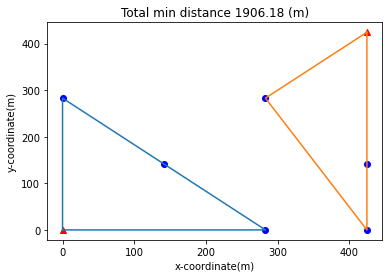

this is inside collecting time
[6, 2, 4]
#####
[0, 8, 5, 2]
this is inside collecting time
{0: [], 8: [4], 5: [1, 2, 3], 2: [0]}
this is to check for collecting time
[4, 1, 2, 3, 0]
this is inside collecting time
[5, 3, 7]
#####
[15, 10, 12, 13]
this is inside collecting time
{15: [], 10: [5, 6, 7], 12: [8], 13: [9]}
this is to check for collecting time
[5, 6, 7, 8, 9]
dist[0,6]=282
dist[6,2]=200
dist[2,4]=200
dist[4,0]=282
dist[1,5]=200
dist[5,3]=316
dist[3,7]=141
dist[7,1]=282
[0, 8, 5, 2, 0]
this is temp
[4, 1, 2, 3, 0]
this is temp
[4, 1, 2, 3, 0]
this is temp
[4, 1, 2, 3, 0]
this is temp
[4, 1, 2, 3, 0]
defaultdict(<class 'list'>, {(0, 8): [4], (8, 5): [4, 3, 2], (5, 2): [3, 2, 1, 0], (2, 0): [1]})
defaultdict(<class 'list'>, {(0, 8): [4], (8, 5): [3, 2], (5, 2): [1, 0], (2, 0): []})
5
defaultdict(<class 'list'>, {(0, 8): [4], (8, 5): [3, 2], (5, 2): [1, 0], (2, 0): []})
[15, 10, 12, 13, 15]
this is temp
[5, 6, 7, 8, 9]
this is temp
[5, 6, 7, 8, 9]
this is temp
[5, 6, 7, 8, 9]
thi

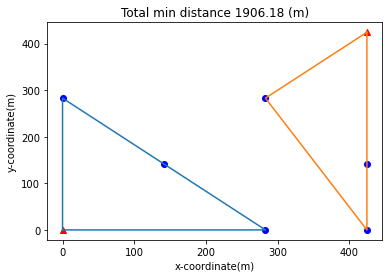

this is inside collecting time
[6, 2, 4]
#####
[0, 8, 5, 2]
this is inside collecting time
{0: [], 8: [4], 5: [1, 2, 3], 2: [0]}
this is to check for collecting time
[4, 1, 2, 3, 0]
this is inside collecting time
[5, 3, 7]
#####
[15, 10, 12, 13]
this is inside collecting time
{15: [], 10: [5, 6, 7], 12: [8], 13: [9]}
this is to check for collecting time
[5, 6, 7, 8, 9]
dist[0,6]=282
dist[6,2]=200
dist[2,4]=200
dist[4,0]=282
dist[1,5]=200
dist[5,3]=316
dist[3,7]=141
dist[7,1]=282
[0, 8, 5, 2, 0]
this is temp
[4, 1, 2, 3, 0]
this is temp
[4, 1, 2, 3, 0]
this is temp
[4, 1, 2, 3, 0]
this is temp
[4, 1, 2, 3, 0]
defaultdict(<class 'list'>, {(0, 8): [4], (8, 5): [4, 3, 2], (5, 2): [3, 2, 1, 0], (2, 0): [1]})
defaultdict(<class 'list'>, {(0, 8): [4], (8, 5): [3, 2], (5, 2): [1, 0], (2, 0): []})
5
defaultdict(<class 'list'>, {(0, 8): [4], (8, 5): [3, 2], (5, 2): [1, 0], (2, 0): []})
[15, 10, 12, 13, 15]
this is temp
[5, 6, 7, 8, 9]
this is temp
[5, 6, 7, 8, 9]
this is temp
[5, 6, 7, 8, 9]
thi

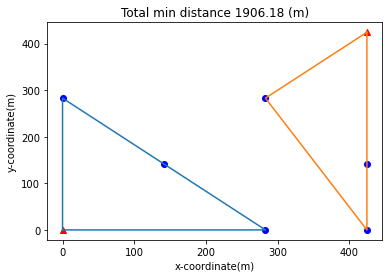

this is inside collecting time
[6, 2, 4]
#####
[0, 8, 5, 2]
this is inside collecting time
{0: [], 8: [4], 5: [1, 2, 3], 2: [0]}
this is to check for collecting time
[4, 1, 2, 3, 0]
this is inside collecting time
[5, 3, 7]
#####
[15, 10, 12, 13]
this is inside collecting time
{15: [], 10: [5, 6, 7], 12: [8], 13: [9]}
this is to check for collecting time
[5, 6, 7, 8, 9]
dist[0,6]=282
dist[6,2]=200
dist[2,4]=200
dist[4,0]=282
dist[1,5]=200
dist[5,3]=316
dist[3,7]=141
dist[7,1]=282
[0, 8, 5, 2, 0]
this is temp
[4, 1, 2, 3, 0]
this is temp
[4, 1, 2, 3, 0]
this is temp
[4, 1, 2, 3, 0]
this is temp
[4, 1, 2, 3, 0]
defaultdict(<class 'list'>, {(0, 8): [4], (8, 5): [4, 3, 2], (5, 2): [3, 2, 1, 0], (2, 0): [1]})
defaultdict(<class 'list'>, {(0, 8): [4], (8, 5): [3, 2], (5, 2): [1, 0], (2, 0): []})
5
defaultdict(<class 'list'>, {(0, 8): [4], (8, 5): [3, 2], (5, 2): [1, 0], (2, 0): []})
[15, 10, 12, 13, 15]
this is temp
[5, 6, 7, 8, 9]
this is temp
[5, 6, 7, 8, 9]
this is temp
[5, 6, 7, 8, 9]
thi

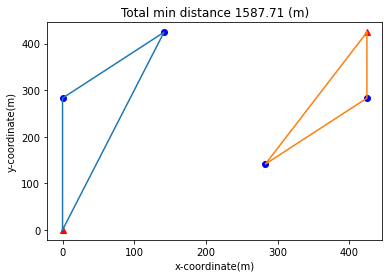

this is inside collecting time
[5, 4]
#####
[0, 2, 7]
this is inside collecting time
{0: [], 2: [0], 7: [1, 2]}
this is to check for collecting time
[0, 1, 2]
this is inside collecting time
[2, 3]
#####
[15, 9, 14]
this is inside collecting time
{15: [7, 8], 9: [3, 4, 5], 14: [6, 9]}
this is to check for collecting time
[3, 4, 5, 6, 7, 8, 9]
dist[0,5]=282
dist[5,4]=200
dist[4,0]=447
dist[1,2]=316
dist[2,3]=200
dist[3,1]=141
[0, 2, 7, 0]
this is temp
[0, 1, 2]
this is temp
[0, 1, 2]
this is temp
[0, 1, 2]
defaultdict(<class 'list'>, {(0, 2): [0], (2, 7): [0, 1, 2], (7, 0): [2, 1, 0]})
defaultdict(<class 'list'>, {(0, 2): [0], (2, 7): [1, 2], (7, 0): []})
3
defaultdict(<class 'list'>, {(0, 2): [0], (2, 7): [1, 2], (7, 0): []})
[15, 9, 14, 15]
this is temp
[3, 4, 5, 6, 7, 8, 9]
this is temp
[3, 4, 5, 6, 7, 8, 9]
this is temp
[3, 4, 5, 6, 7, 8, 9]
defaultdict(<class 'list'>, {(15, 9): [7, 8, 6, 9, 5, 4, 3], (9, 14): [3, 4, 5, 9, 6, 8], (14, 15): [9, 6, 7]})
defaultdict(<class 'list'>, {(15

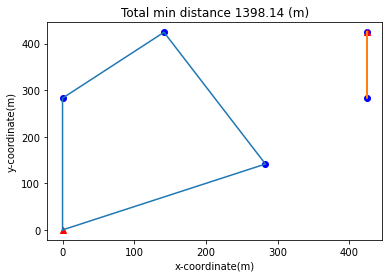

this is inside collecting time
[6, 4, 2]
#####
[0, 2, 7, 9]
this is inside collecting time
{0: [], 2: [0], 7: [1, 2], 9: [3, 4, 5]}
this is to check for collecting time
[0, 1, 2, 3, 4, 5]
this is inside collecting time
[3, 5]
#####
[15, 15, 14]
this is inside collecting time
{15: [7, 8], 14: [6, 9]}
this is to check for collecting time
[7, 8, 7, 8, 6, 9, 7, 8]
dist[0,6]=282
dist[6,4]=200
dist[4,2]=316
dist[2,0]=316
dist[1,3]=0
dist[3,5]=141
dist[5,1]=141
[0, 2, 7, 9, 0]
this is temp
[0, 1, 2, 3, 4, 5]
this is temp
[0, 1, 2, 3, 4, 5]
this is temp
[0, 1, 2, 3, 4, 5]
this is temp
[0, 1, 2, 3, 4, 5]
defaultdict(<class 'list'>, {(0, 2): [0], (2, 7): [0, 1, 2], (7, 9): [1, 2, 4, 5, 3], (9, 0): [5, 4, 3]})
defaultdict(<class 'list'>, {(0, 2): [0], (2, 7): [1, 2], (7, 9): [4, 5, 3], (9, 0): []})
6
defaultdict(<class 'list'>, {(0, 2): [0], (2, 7): [1, 2], (7, 9): [4, 5, 3], (9, 0): []})
[15, 15, 14, 15]
this is temp
[7, 8, 7, 8, 6, 9, 7, 8]
this is temp
[7, 8, 7, 8, 6, 9, 7, 8]
this is temp
[7,

<ipython-input-46-989841d46c2b>:21: RuntimeWarning: invalid value encountered in true_divide
  dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp


{(207.9, 215.1): 6}
{(204.6, 92.6): 5, (211.2, 337.6): 6}
{(220.25, 67.5): 8, (259.25, 346.5): 10, (80.5, 247.5): 6}
{(163.0, 102.5): 5, (259.25, 346.5): 10, (371.0, 53.0): 12, (19.0, 302.0): 2}
{(208.0, 330.5): 6, (163.0, 102.5): 5, (310.5, 362.5): 11, (19.0, 302.0): 2, (371.0, 53.0): 12}
5
i am here
this is no of vehic
2

this is K value
2
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 55 rows, 104 columns and 441 nonzeros
Model fingerprint: 0x4d5060fe
Variable types: 1 continuous, 103 integer (98 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 5e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 1002249.4643
Presolve removed 1 rows and 34 columns
Presolve time: 0.00s
Presolved: 54 rows, 70 columns, 355 nonzeros
Variable types: 0 continuous, 70 integer (65 binary)

Root relaxati

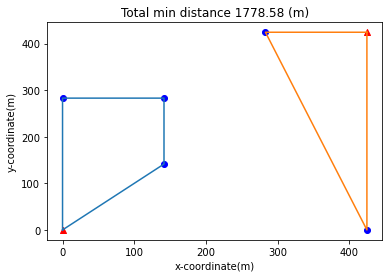

this is inside collecting time
[3, 2, 5]
#####
[0, 5, 6, 2]
this is inside collecting time
{0: [], 5: [1, 2, 3, 6], 6: [4, 5, 7], 2: [0]}
this is to check for collecting time
[1, 3, 6, 2, 4, 5, 7, 0]
this is inside collecting time
[6, 4]
#####
[15, 12, 11]
this is inside collecting time
{15: [], 12: [9], 11: [8]}
this is to check for collecting time
[9, 8]
dist[0,3]=200
dist[3,2]=141
dist[2,5]=141
dist[5,0]=282
dist[1,6]=424
dist[6,4]=447
dist[4,1]=141
[0, 5, 6, 2, 0]
this is temp
[1, 3, 6, 2, 4, 5, 7, 0]
this is temp
[1, 3, 6, 2, 4, 5, 7, 0]
this is temp
[1, 3, 6, 2, 4, 5, 7, 0]
this is temp
[1, 3, 6, 2, 4, 5, 7, 0]
defaultdict(<class 'list'>, {(0, 5): [1, 3, 2], (5, 6): [5], (6, 2): [0], (2, 0): [0]})
defaultdict(<class 'list'>, {(0, 5): [1, 3, 2], (5, 6): [5], (6, 2): [0], (2, 0): []})
5
defaultdict(<class 'list'>, {(0, 5): [1, 3, 2], (5, 6): [5], (6, 2): [0], (2, 0): []})
[15, 12, 11, 15]
this is temp
[9, 8]
this is temp
[9, 8]
this is temp
[9, 8]
defaultdict(<class 'list'>, {(15, 

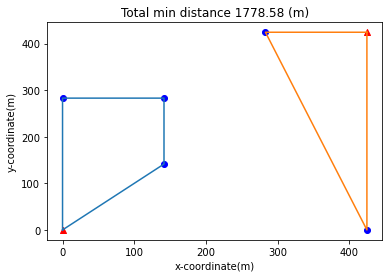

this is inside collecting time
[2, 3, 5]
#####
[0, 5, 6, 2]
this is inside collecting time
{0: [], 5: [1, 2, 3, 6], 6: [4, 5, 7], 2: [0]}
this is to check for collecting time
[1, 2, 3, 6, 4, 5, 7, 0]
this is inside collecting time
[4, 6]
#####
[15, 12, 11]
this is inside collecting time
{15: [], 12: [9], 11: [8]}
this is to check for collecting time
[9, 8]
dist[0,2]=200
dist[2,3]=141
dist[3,5]=141
dist[5,0]=282
dist[1,4]=424
dist[4,6]=447
dist[6,1]=141
[0, 5, 6, 2, 0]
this is temp
[1, 2, 3, 6, 4, 5, 7, 0]
this is temp
[1, 2, 3, 6, 4, 5, 7, 0]
this is temp
[1, 2, 3, 6, 4, 5, 7, 0]
this is temp
[1, 2, 3, 6, 4, 5, 7, 0]
defaultdict(<class 'list'>, {(0, 5): [1, 3, 2], (5, 6): [5], (6, 2): [0], (2, 0): [0]})
defaultdict(<class 'list'>, {(0, 5): [1, 3, 2], (5, 6): [5], (6, 2): [0], (2, 0): []})
5
defaultdict(<class 'list'>, {(0, 5): [1, 3, 2], (5, 6): [5], (6, 2): [0], (2, 0): []})
[15, 12, 11, 15]
this is temp
[9, 8]
this is temp
[9, 8]
this is temp
[9, 8]
defaultdict(<class 'list'>, {(15, 

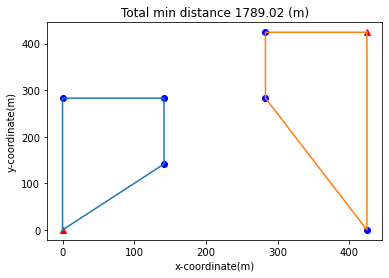

this is inside collecting time
[5, 3, 2]
#####
[0, 2, 6, 5]
this is inside collecting time
{0: [], 2: [0], 6: [2, 4, 5, 7], 5: [1, 3, 6]}
this is to check for collecting time
[0, 4, 5, 1, 2, 3, 6]
this is inside collecting time
[7, 6, 4]
#####
[15, 11, 10, 12]
this is inside collecting time
{15: [], 11: [8], 10: [4, 5, 7], 12: [9]}
this is to check for collecting time
[8, 7, 9]
dist[0,5]=282
dist[5,3]=141
dist[3,2]=141
dist[2,0]=200
dist[1,7]=141
dist[7,6]=141
dist[6,4]=316
dist[4,1]=424
[0, 2, 6, 5, 0]
this is temp
[0, 4, 5, 1, 2, 3, 6]
this is temp
[0, 4, 5, 1, 2, 3, 6]
this is temp
[0, 4, 5, 1, 2, 3, 6]
this is temp
[0, 4, 5, 1, 2, 3, 6]
defaultdict(<class 'list'>, {(0, 2): [0], (2, 6): [0, 2], (5, 0): [2, 3, 1]})
defaultdict(<class 'list'>, {(0, 2): [0], (2, 6): [2], (5, 0): [3, 1]})
4
defaultdict(<class 'list'>, {(0, 2): [0], (2, 6): [2], (5, 0): [3, 1]})
[15, 11, 10, 12, 15]
this is temp
[8, 7, 9]
this is temp
[8, 7, 9]
this is temp
[8, 7, 9]
this is temp
[8, 7, 9]
defaultdict(<c

In [58]:
besttime,execttime=pipeline()

In [59]:
besttime

[310.01876932485897,
 229.21637408471577,
 249.21637408471577,
 301.62090591803513,
 285.88304075138245,
 333.49727824292216,
 310.01876932485897,
 321.895141649746,
 310.01876932485897,
 337.6330068163987]

In [60]:
execttime

[1.933964490890503,
 0.9363203048706055,
 0.5367066860198975,
 0.6035566329956055,
 1.6486616134643555,
 0.6820402145385742,
 1.3591058254241943,
 1.3338203430175781,
 0.597261905670166,
 0.8016133308410645]